In [1]:
# Deliverable 3
# Optimize the NeuralNetworks

In [3]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import & read charity_data.csv
import pandas as pd
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN","NAME"],1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df["APPLICATION_TYPE"].value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

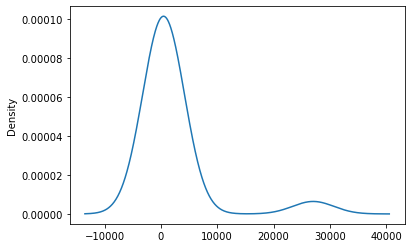

In [7]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [8]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df["CLASSIFICATION"].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2600        1
C4200        1
C5200        1
C2170        1
C1732        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

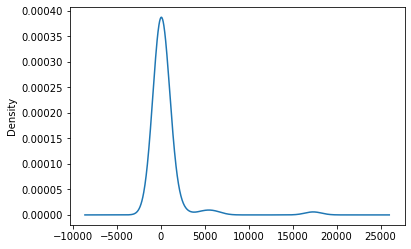

In [11]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Look at Ask_Amt value counts for binning
Ask_Amt_counts = application_df["ASK_AMT"].value_counts()
Ask_Amt_counts

5000       25398
15583          3
6725           3
63981          3
10478          3
           ...  
75598          1
22336          1
44863          1
5928           1
6948863        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

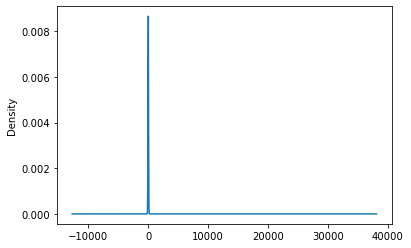

In [14]:
# Visualize the value counts of APPLICATION_TYPE
Ask_Amt_counts.plot.density()

In [15]:
# Pointy! Don't bin.

In [16]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M

In [20]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL","SPECIAL_CONSIDERATIONS_N","SPECIAL_CONSIDERATIONS_Y"] ,1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3360      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,821
Trainable params: 5,821
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

In [25]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
 63/804 [=>............................] - ETA: 0s - loss: 0.6593 - accuracy: 0.6394   
Epoch 00001: saving model to checkpoints/weights.01.hdf5
165/804 [=====>........................] - ETA: 0s - loss: 0.6131 - accuracy: 0.6884
Epoch 00001: saving model to checkpoints/weights.01.hdf5
275/804 [=========>....................] - ETA: 0s - loss: 0.5958 - accuracy: 0.7009
Epoch 00001: saving model to checkpoints/weights.01.hdf5
399/804 [=============>................] - ETA: 0s - loss: 0.5866 - accuracy: 0.7093
Epoch 00001: saving model to checkpoints/weights.01.hdf5
485/804 [=================>............] - ETA: 0s - loss: 0.5838 - accuracy: 0.7115
Epoch 00001: saving model to checkpoints/weights.01.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.5821 - accuracy: 0.7116
Epoch 00001: saving model to checkpoints/weights.01.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5770 - accuracy: 0.7160
Epoch 00001: saving model to checkpoints/weights

562/804 [===================>..........] - ETA: 0s - loss: 0.5457 - accuracy: 0.7359
Epoch 00007: saving model to checkpoints/weights.07.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5459 - accuracy: 0.7364
Epoch 00007: saving model to checkpoints/weights.07.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5475 - accuracy: 0.7348
Epoch 00007: saving model to checkpoints/weights.07.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5482 - accuracy: 0.7344
Epoch 8/100
 67/804 [=>............................] - ETA: 0s - loss: 0.5519 - accuracy: 0.7248
Epoch 00008: saving model to checkpoints/weights.08.hdf5
167/804 [=====>........................] - ETA: 0s - loss: 0.5483 - accuracy: 0.7309
Epoch 00008: saving model to checkpoints/weights.08.hdf5
218/804 [=======>......................] - ETA: 0s - loss: 0.5456 - accuracy: 0.7357
Epoch 00008: saving model to checkpoints/weights.08.hdf5
340/804 [===========>..................] - ETA:

182/804 [=====>........................] - ETA: 0s - loss: 0.5347 - accuracy: 0.7409
Epoch 00014: saving model to checkpoints/weights.14.hdf5
315/804 [==========>...................] - ETA: 0s - loss: 0.5387 - accuracy: 0.7383
Epoch 00014: saving model to checkpoints/weights.14.hdf5
437/804 [===============>..............] - ETA: 0s - loss: 0.5444 - accuracy: 0.7347
Epoch 00014: saving model to checkpoints/weights.14.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5483 - accuracy: 0.7328
Epoch 00014: saving model to checkpoints/weights.14.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5459 - accuracy: 0.7349
Epoch 00014: saving model to checkpoints/weights.14.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5455 - accuracy: 0.7355
Epoch 00014: saving model to checkpoints/weights.14.hdf5
804/804 [==============================] - 1s 870us/step - loss: 0.5450 - accuracy: 0.7352
Epoch 15/100
  1/804 [..............................] - E

691/804 [========================>.....] - ETA: 0s - loss: 0.5425 - accuracy: 0.7371
Epoch 00020: saving model to checkpoints/weights.20.hdf5
804/804 [==============================] - 1s 815us/step - loss: 0.5434 - accuracy: 0.7369
Epoch 21/100
  1/804 [..............................] - ETA: 1s - loss: 0.4429 - accuracy: 0.7500
Epoch 00021: saving model to checkpoints/weights.21.hdf5
106/804 [==>...........................] - ETA: 0s - loss: 0.5396 - accuracy: 0.7376
Epoch 00021: saving model to checkpoints/weights.21.hdf5
215/804 [=======>......................] - ETA: 0s - loss: 0.5464 - accuracy: 0.7324
Epoch 00021: saving model to checkpoints/weights.21.hdf5
269/804 [=========>....................] - ETA: 0s - loss: 0.5448 - accuracy: 0.7356
Epoch 00021: saving model to checkpoints/weights.21.hdf5
379/804 [=============>................] - ETA: 0s - loss: 0.5400 - accuracy: 0.7400
Epoch 00021: saving model to checkpoints/weights.21.hdf5
487/804 [=================>............] - E

255/804 [========>.....................] - ETA: 0s - loss: 0.5430 - accuracy: 0.7380
Epoch 00027: saving model to checkpoints/weights.27.hdf5
358/804 [============>.................] - ETA: 0s - loss: 0.5447 - accuracy: 0.7371
Epoch 00027: saving model to checkpoints/weights.27.hdf5
454/804 [===============>..............] - ETA: 0s - loss: 0.5453 - accuracy: 0.7351
Epoch 00027: saving model to checkpoints/weights.27.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5411 - accuracy: 0.7382
Epoch 00027: saving model to checkpoints/weights.27.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5398 - accuracy: 0.7396
Epoch 00027: saving model to checkpoints/weights.27.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.5404 - accuracy: 0.7382
Epoch 00027: saving model to checkpoints/weights.27.hdf5
804/804 [==============================] - 1s 987us/step - loss: 0.5416 - accuracy: 0.7372
Epoch 28/100
 57/804 [=>............................] - E

722/804 [=========================>....] - ETA: 0s - loss: 0.5424 - accuracy: 0.7368
Epoch 00033: saving model to checkpoints/weights.33.hdf5
804/804 [==============================] - 1s 708us/step - loss: 0.5416 - accuracy: 0.7376
Epoch 34/100
  1/804 [..............................] - ETA: 0s - loss: 0.5620 - accuracy: 0.7812
Epoch 00034: saving model to checkpoints/weights.34.hdf5
147/804 [====>.........................] - ETA: 0s - loss: 0.5382 - accuracy: 0.7426
Epoch 00034: saving model to checkpoints/weights.34.hdf5
212/804 [======>.......................] - ETA: 0s - loss: 0.5381 - accuracy: 0.7403
Epoch 00034: saving model to checkpoints/weights.34.hdf5
315/804 [==========>...................] - ETA: 0s - loss: 0.5405 - accuracy: 0.7360
Epoch 00034: saving model to checkpoints/weights.34.hdf5
446/804 [===============>..............] - ETA: 0s - loss: 0.5374 - accuracy: 0.7389
Epoch 00034: saving model to checkpoints/weights.34.hdf5
515/804 [==================>...........] - E

322/804 [===========>..................] - ETA: 0s - loss: 0.5402 - accuracy: 0.7368
Epoch 00040: saving model to checkpoints/weights.40.hdf5
381/804 [=============>................] - ETA: 0s - loss: 0.5390 - accuracy: 0.7379
Epoch 00040: saving model to checkpoints/weights.40.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.5384 - accuracy: 0.7394
Epoch 00040: saving model to checkpoints/weights.40.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.5391 - accuracy: 0.7381
Epoch 00040: saving model to checkpoints/weights.40.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5412 - accuracy: 0.7377
Epoch 00040: saving model to checkpoints/weights.40.hdf5
804/804 [==============================] - 1s 764us/step - loss: 0.5407 - accuracy: 0.7378
Epoch 41/100
  1/804 [..............................] - ETA: 1s - loss: 0.6299 - accuracy: 0.6250
Epoch 00041: saving model to checkpoints/weights.41.hdf5
123/804 [===>..........................] - E

804/804 [==============================] - 1s 821us/step - loss: 0.5396 - accuracy: 0.7382
Epoch 47/100
  1/804 [..............................] - ETA: 1s - loss: 0.4954 - accuracy: 0.7500
Epoch 00047: saving model to checkpoints/weights.47.hdf5
104/804 [==>...........................] - ETA: 0s - loss: 0.5417 - accuracy: 0.7344
Epoch 00047: saving model to checkpoints/weights.47.hdf5
162/804 [=====>........................] - ETA: 0s - loss: 0.5421 - accuracy: 0.7319
Epoch 00047: saving model to checkpoints/weights.47.hdf5
293/804 [=========>....................] - ETA: 0s - loss: 0.5414 - accuracy: 0.7342
Epoch 00047: saving model to checkpoints/weights.47.hdf5
364/804 [============>.................] - ETA: 0s - loss: 0.5394 - accuracy: 0.7368
Epoch 00047: saving model to checkpoints/weights.47.hdf5
500/804 [=================>............] - ETA: 0s - loss: 0.5409 - accuracy: 0.7351
Epoch 00047: saving model to checkpoints/weights.47.hdf5
570/804 [====================>.........] - E

358/804 [============>.................] - ETA: 0s - loss: 0.5433 - accuracy: 0.7365
Epoch 00053: saving model to checkpoints/weights.53.hdf5
425/804 [==============>...............] - ETA: 0s - loss: 0.5436 - accuracy: 0.7358
Epoch 00053: saving model to checkpoints/weights.53.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 0.5399 - accuracy: 0.7380
Epoch 00053: saving model to checkpoints/weights.53.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5397 - accuracy: 0.7396
Epoch 00053: saving model to checkpoints/weights.53.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5391 - accuracy: 0.7393
Epoch 00053: saving model to checkpoints/weights.53.hdf5
804/804 [==============================] - 1s 781us/step - loss: 0.5390 - accuracy: 0.7394
Epoch 54/100
 65/804 [=>............................] - ETA: 0s - loss: 0.5403 - accuracy: 0.7442
Epoch 00054: saving model to checkpoints/weights.54.hdf5
179/804 [=====>........................] - E

804/804 [==============================] - 1s 960us/step - loss: 0.5386 - accuracy: 0.7394
Epoch 60/100
 49/804 [>.............................] - ETA: 0s - loss: 0.5264 - accuracy: 0.7436
Epoch 00060: saving model to checkpoints/weights.60.hdf5
153/804 [====>.........................] - ETA: 0s - loss: 0.5417 - accuracy: 0.7355
Epoch 00060: saving model to checkpoints/weights.60.hdf5
204/804 [======>.......................] - ETA: 0s - loss: 0.5425 - accuracy: 0.7359
Epoch 00060: saving model to checkpoints/weights.60.hdf5
324/804 [===========>..................] - ETA: 0s - loss: 0.5449 - accuracy: 0.7355
Epoch 00060: saving model to checkpoints/weights.60.hdf5
432/804 [===============>..............] - ETA: 0s - loss: 0.5442 - accuracy: 0.7357
Epoch 00060: saving model to checkpoints/weights.60.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.5394 - accuracy: 0.7396
Epoch 00060: saving model to checkpoints/weights.60.hdf5
642/804 [======================>.......] - E

379/804 [=============>................] - ETA: 0s - loss: 0.5340 - accuracy: 0.7429
Epoch 00066: saving model to checkpoints/weights.66.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.5350 - accuracy: 0.7413
Epoch 00066: saving model to checkpoints/weights.66.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.5345 - accuracy: 0.7416
Epoch 00066: saving model to checkpoints/weights.66.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5371 - accuracy: 0.7402
Epoch 00066: saving model to checkpoints/weights.66.hdf5
804/804 [==============================] - 1s 825us/step - loss: 0.5382 - accuracy: 0.7397
Epoch 67/100
  1/804 [..............................] - ETA: 1s - loss: 0.5096 - accuracy: 0.6875
Epoch 00067: saving model to checkpoints/weights.67.hdf5
 95/804 [==>...........................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7421
Epoch 00067: saving model to checkpoints/weights.67.hdf5
215/804 [=======>......................] - E

  1/804 [..............................] - ETA: 0s - loss: 0.5615 - accuracy: 0.7500
Epoch 00073: saving model to checkpoints/weights.73.hdf5
111/804 [===>..........................] - ETA: 0s - loss: 0.5403 - accuracy: 0.7385
Epoch 00073: saving model to checkpoints/weights.73.hdf5
162/804 [=====>........................] - ETA: 0s - loss: 0.5367 - accuracy: 0.7398
Epoch 00073: saving model to checkpoints/weights.73.hdf5
286/804 [=========>....................] - ETA: 0s - loss: 0.5371 - accuracy: 0.7401
Epoch 00073: saving model to checkpoints/weights.73.hdf5
350/804 [============>.................] - ETA: 0s - loss: 0.5365 - accuracy: 0.7418
Epoch 00073: saving model to checkpoints/weights.73.hdf5
483/804 [=================>............] - ETA: 0s - loss: 0.5377 - accuracy: 0.7407
Epoch 00073: saving model to checkpoints/weights.73.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.5384 - accuracy: 0.7402
Epoch 00073: saving model to checkpoints/weights.73.hdf5
685/80

418/804 [==============>...............] - ETA: 0s - loss: 0.5336 - accuracy: 0.7401
Epoch 00079: saving model to checkpoints/weights.79.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5350 - accuracy: 0.7411
Epoch 00079: saving model to checkpoints/weights.79.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5358 - accuracy: 0.7396
Epoch 00079: saving model to checkpoints/weights.79.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5365 - accuracy: 0.7393
Epoch 00079: saving model to checkpoints/weights.79.hdf5
804/804 [==============================] - 1s 708us/step - loss: 0.5371 - accuracy: 0.7394
Epoch 80/100
 80/804 [=>............................] - ETA: 0s - loss: 0.5399 - accuracy: 0.7344
Epoch 00080: saving model to checkpoints/weights.80.hdf5
152/804 [====>.........................] - ETA: 0s - loss: 0.5471 - accuracy: 0.7290
Epoch 00080: saving model to checkpoints/weights.80.hdf5
224/804 [=======>......................] - E

 53/804 [>.............................] - ETA: 0s - loss: 0.5345 - accuracy: 0.7512
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 99/804 [==>...........................] - ETA: 0s - loss: 0.5409 - accuracy: 0.7374
Epoch 00086: saving model to checkpoints/weights.86.hdf5
207/804 [======>.......................] - ETA: 0s - loss: 0.5402 - accuracy: 0.7360
Epoch 00086: saving model to checkpoints/weights.86.hdf5
316/804 [==========>...................] - ETA: 0s - loss: 0.5421 - accuracy: 0.7353
Epoch 00086: saving model to checkpoints/weights.86.hdf5
424/804 [==============>...............] - ETA: 0s - loss: 0.5407 - accuracy: 0.7360
Epoch 00086: saving model to checkpoints/weights.86.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.5368 - accuracy: 0.7393
Epoch 00086: saving model to checkpoints/weights.86.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5386 - accuracy: 0.7383
Epoch 00086: saving model to checkpoints/weights.86.hdf5
719/80

526/804 [==================>...........] - ETA: 0s - loss: 0.5368 - accuracy: 0.7416
Epoch 00092: saving model to checkpoints/weights.92.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5372 - accuracy: 0.7402
Epoch 00092: saving model to checkpoints/weights.92.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5378 - accuracy: 0.7391
Epoch 00092: saving model to checkpoints/weights.92.hdf5
804/804 [==============================] - 1s 893us/step - loss: 0.5369 - accuracy: 0.7400
Epoch 93/100
  1/804 [..............................] - ETA: 0s - loss: 0.6026 - accuracy: 0.6875
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 65/804 [=>............................] - ETA: 0s - loss: 0.5314 - accuracy: 0.7370
Epoch 00093: saving model to checkpoints/weights.93.hdf5
207/804 [======>.......................] - ETA: 0s - loss: 0.5319 - accuracy: 0.7376
Epoch 00093: saving model to checkpoints/weights.93.hdf5
272/804 [=========>....................] - E

 99/804 [==>...........................] - ETA: 0s - loss: 0.5306 - accuracy: 0.7453
Epoch 00099: saving model to checkpoints/weights.99.hdf5
183/804 [=====>........................] - ETA: 0s - loss: 0.5422 - accuracy: 0.7334
Epoch 00099: saving model to checkpoints/weights.99.hdf5
286/804 [=========>....................] - ETA: 0s - loss: 0.5397 - accuracy: 0.7346
Epoch 00099: saving model to checkpoints/weights.99.hdf5
375/804 [============>.................] - ETA: 0s - loss: 0.5374 - accuracy: 0.7378
Epoch 00099: saving model to checkpoints/weights.99.hdf5
473/804 [================>.............] - ETA: 0s - loss: 0.5377 - accuracy: 0.7388
Epoch 00099: saving model to checkpoints/weights.99.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5371 - accuracy: 0.7397
Epoch 00099: saving model to checkpoints/weights.99.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5364 - accuracy: 0.7396
Epoch 00099: saving model to checkpoints/weights.99.hdf5
804/80

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5535 - accuracy: 0.7265
Loss: 0.5535386204719543, Accuracy: 0.7265306115150452


In [27]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

In [29]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop("IS_SUCCESSFUL" ,1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [30]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn_2nd = tf.keras.models.Sequential()

# First hidden layer
nn_2nd.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn_2nd.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn_2nd.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn_2nd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3520      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [34]:
# Compile the model
nn_2nd.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

In [35]:
# Train the model
fit_model = nn_2nd.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
 89/804 [==>...........................] - ETA: 0s - loss: 8.2920 - accuracy: 0.4624 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
191/804 [======>.......................] - ETA: 0s - loss: 8.2727 - accuracy: 0.4637
Epoch 00001: saving model to checkpoints/weights.01.hdf5
268/804 [=========>....................] - ETA: 0s - loss: 8.2808 - accuracy: 0.4632
Epoch 00001: saving model to checkpoints/weights.01.hdf5
349/804 [============>.................] - ETA: 0s - loss: 8.2870 - accuracy: 0.4628
Epoch 00001: saving model to checkpoints/weights.01.hdf5
458/804 [================>.............] - ETA: 0s - loss: 8.2703 - accuracy: 0.4638
Epoch 00001: saving model to checkpoints/weights.01.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 8.2584 - accuracy: 0.4646
Epoch 00001: saving model to checkpoints/weights.01.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 8.2472 - accuracy: 0.4653
Epoch 00001: saving model to checkpoints/weights.0

540/804 [===================>..........] - ETA: 0s - loss: 8.2284 - accuracy: 0.4666
Epoch 00007: saving model to checkpoints/weights.07.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 8.2256 - accuracy: 0.4667
Epoch 00007: saving model to checkpoints/weights.07.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 8.2206 - accuracy: 0.4671
Epoch 00007: saving model to checkpoints/weights.07.hdf5
804/804 [==============================] - 1s 911us/step - loss: 8.2084 - accuracy: 0.4679
Epoch 8/100
 63/804 [=>............................] - ETA: 0s - loss: 7.9803 - accuracy: 0.4826
Epoch 00008: saving model to checkpoints/weights.08.hdf5
118/804 [===>..........................] - ETA: 0s - loss: 8.0148 - accuracy: 0.4804
Epoch 00008: saving model to checkpoints/weights.08.hdf5
239/804 [=======>......................] - ETA: 0s - loss: 8.1461 - accuracy: 0.4719
Epoch 00008: saving model to checkpoints/weights.08.hdf5
365/804 [============>.................] - ET

243/804 [========>.....................] - ETA: 0s - loss: 8.3373 - accuracy: 0.4595
Epoch 00014: saving model to checkpoints/weights.14.hdf5
334/804 [===========>..................] - ETA: 0s - loss: 8.3085 - accuracy: 0.4614
Epoch 00014: saving model to checkpoints/weights.14.hdf5
448/804 [===============>..............] - ETA: 0s - loss: 8.2494 - accuracy: 0.4652
Epoch 00014: saving model to checkpoints/weights.14.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 8.2446 - accuracy: 0.4655
Epoch 00014: saving model to checkpoints/weights.14.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 8.2358 - accuracy: 0.4661
Epoch 00014: saving model to checkpoints/weights.14.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 8.2158 - accuracy: 0.4674
Epoch 00014: saving model to checkpoints/weights.14.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 15/100
  1/804 [..............................] - ETA

716/804 [=========================>....] - ETA: 0s - loss: 8.1763 - accuracy: 0.4699
Epoch 00020: saving model to checkpoints/weights.20.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 21/100
  1/804 [..............................] - ETA: 1s - loss: 7.7125 - accuracy: 0.5000
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 93/804 [==>...........................] - ETA: 0s - loss: 8.2671 - accuracy: 0.4640
Epoch 00021: saving model to checkpoints/weights.21.hdf5
192/804 [======>.......................] - ETA: 0s - loss: 8.1091 - accuracy: 0.4743
Epoch 00021: saving model to checkpoints/weights.21.hdf5
281/804 [=========>....................] - ETA: 0s - loss: 8.1225 - accuracy: 0.4734
Epoch 00021: saving model to checkpoints/weights.21.hdf5
377/804 [=============>................] - ETA: 0s - loss: 8.1191 - accuracy: 0.4736
Epoch 00021: saving model to checkpoints/weights.21.hdf5
478/804 [================>.............] - ETA

363/804 [============>.................] - ETA: 0s - loss: 8.2463 - accuracy: 0.4654
Epoch 00027: saving model to checkpoints/weights.27.hdf5
429/804 [===============>..............] - ETA: 0s - loss: 8.1866 - accuracy: 0.4693
Epoch 00027: saving model to checkpoints/weights.27.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 8.2325 - accuracy: 0.4663
Epoch 00027: saving model to checkpoints/weights.27.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 8.2178 - accuracy: 0.4672
Epoch 00027: saving model to checkpoints/weights.27.hdf5
778/804 [============================>.] - ETA: 0s - loss: 8.2069 - accuracy: 0.4679
Epoch 00027: saving model to checkpoints/weights.27.hdf5
804/804 [==============================] - 1s 848us/step - loss: 8.2084 - accuracy: 0.4679
Epoch 28/100
 71/804 [=>............................] - ETA: 0s - loss: 8.2624 - accuracy: 0.4643 
Epoch 00028: saving model to checkpoints/weights.28.hdf5
143/804 [====>.........................] - 

804/804 [==============================] - 1s 715us/step - loss: 8.2084 - accuracy: 0.4679
Epoch 34/100
 68/804 [=>............................] - ETA: 0s - loss: 7.8401 - accuracy: 0.4917
Epoch 00034: saving model to checkpoints/weights.34.hdf5
132/804 [===>..........................] - ETA: 0s - loss: 7.9425 - accuracy: 0.4851
Epoch 00034: saving model to checkpoints/weights.34.hdf5
268/804 [=========>....................] - ETA: 0s - loss: 8.2467 - accuracy: 0.4654
Epoch 00034: saving model to checkpoints/weights.34.hdf5
337/804 [===========>..................] - ETA: 0s - loss: 8.2403 - accuracy: 0.4658
Epoch 00034: saving model to checkpoints/weights.34.hdf5
408/804 [==============>...............] - ETA: 0s - loss: 8.2512 - accuracy: 0.4651
Epoch 00034: saving model to checkpoints/weights.34.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 8.2511 - accuracy: 0.4651
Epoch 00034: saving model to checkpoints/weights.34.hdf5
660/804 [=======================>......] - E

421/804 [==============>...............] - ETA: 0s - loss: 8.2277 - accuracy: 0.4666
Epoch 00040: saving model to checkpoints/weights.40.hdf5
512/804 [==================>...........] - ETA: 0s - loss: 8.2331 - accuracy: 0.4662
Epoch 00040: saving model to checkpoints/weights.40.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 8.2426 - accuracy: 0.4656
Epoch 00040: saving model to checkpoints/weights.40.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 8.2116 - accuracy: 0.4676
Epoch 00040: saving model to checkpoints/weights.40.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 41/100
  1/804 [..............................] - ETA: 1s - loss: 8.6765 - accuracy: 0.4375
Epoch 00041: saving model to checkpoints/weights.41.hdf5
 91/804 [==>...........................] - ETA: 0s - loss: 8.4064 - accuracy: 0.4550
Epoch 00041: saving model to checkpoints/weights.41.hdf5
240/804 [=======>......................] - ETA

104/804 [==>...........................] - ETA: 0s - loss: 8.0137 - accuracy: 0.4805
Epoch 00047: saving model to checkpoints/weights.47.hdf5
161/804 [=====>........................] - ETA: 0s - loss: 8.1256 - accuracy: 0.4732
Epoch 00047: saving model to checkpoints/weights.47.hdf5
293/804 [=========>....................] - ETA: 0s - loss: 8.1402 - accuracy: 0.4723
Epoch 00047: saving model to checkpoints/weights.47.hdf5
358/804 [============>.................] - ETA: 0s - loss: 8.1528 - accuracy: 0.4715
Epoch 00047: saving model to checkpoints/weights.47.hdf5
493/804 [=================>............] - ETA: 0s - loss: 8.1476 - accuracy: 0.4718
Epoch 00047: saving model to checkpoints/weights.47.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 8.1704 - accuracy: 0.4703
Epoch 00047: saving model to checkpoints/weights.47.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 8.1973 - accuracy: 0.4686
Epoch 00047: saving model to checkpoints/weights.47.hdf5
804/80

547/804 [===================>..........] - ETA: 0s - loss: 8.1936 - accuracy: 0.4688
Epoch 00053: saving model to checkpoints/weights.53.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 8.1611 - accuracy: 0.4709
Epoch 00053: saving model to checkpoints/weights.53.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 8.1862 - accuracy: 0.4693
Epoch 00053: saving model to checkpoints/weights.53.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 54/100
 51/804 [>.............................] - ETA: 0s - loss: 8.1945 - accuracy: 0.4688
Epoch 00054: saving model to checkpoints/weights.54.hdf5
150/804 [====>.........................] - ETA: 0s - loss: 8.1559 - accuracy: 0.4712
Epoch 00054: saving model to checkpoints/weights.54.hdf5
253/804 [========>.....................] - ETA: 0s - loss: 8.1507 - accuracy: 0.4716
Epoch 00054: saving model to checkpoints/weights.54.hdf5
359/804 [============>.................] - ETA

152/804 [====>.........................] - ETA: 0s - loss: 8.3626 - accuracy: 0.4579
Epoch 00060: saving model to checkpoints/weights.60.hdf5
254/804 [========>.....................] - ETA: 0s - loss: 8.2268 - accuracy: 0.4667
Epoch 00060: saving model to checkpoints/weights.60.hdf5
357/804 [============>.................] - ETA: 0s - loss: 8.2121 - accuracy: 0.4676
Epoch 00060: saving model to checkpoints/weights.60.hdf5
459/804 [================>.............] - ETA: 0s - loss: 8.1357 - accuracy: 0.4726
Epoch 00060: saving model to checkpoints/weights.60.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 8.1560 - accuracy: 0.4712
Epoch 00060: saving model to checkpoints/weights.60.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 8.1518 - accuracy: 0.4715
Epoch 00060: saving model to checkpoints/weights.60.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 8.2079 - accuracy: 0.4679
Epoch 00060: saving model to checkpoints/weights.60.hdf5
804/80

586/804 [====================>.........] - ETA: 0s - loss: 8.2397 - accuracy: 0.4658
Epoch 00066: saving model to checkpoints/weights.66.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 8.2240 - accuracy: 0.4668
Epoch 00066: saving model to checkpoints/weights.66.hdf5
804/804 [==============================] - 1s 942us/step - loss: 8.2084 - accuracy: 0.4679
Epoch 67/100
  1/804 [..............................] - ETA: 0s - loss: 8.1945 - accuracy: 0.4688
Epoch 00067: saving model to checkpoints/weights.67.hdf5
104/804 [==>...........................] - ETA: 0s - loss: 8.1852 - accuracy: 0.4694
Epoch 00067: saving model to checkpoints/weights.67.hdf5
210/804 [======>.......................] - ETA: 0s - loss: 8.2657 - accuracy: 0.4641
Epoch 00067: saving model to checkpoints/weights.67.hdf5
325/804 [===========>..................] - ETA: 0s - loss: 8.2598 - accuracy: 0.4645
Epoch 00067: saving model to checkpoints/weights.67.hdf5
398/804 [=============>................] - E

210/804 [======>.......................] - ETA: 0s - loss: 8.3001 - accuracy: 0.4619
Epoch 00073: saving model to checkpoints/weights.73.hdf5
256/804 [========>.....................] - ETA: 0s - loss: 8.2642 - accuracy: 0.4642
Epoch 00073: saving model to checkpoints/weights.73.hdf5
369/804 [============>.................] - ETA: 0s - loss: 8.3016 - accuracy: 0.4618
Epoch 00073: saving model to checkpoints/weights.73.hdf5
475/804 [================>.............] - ETA: 0s - loss: 8.2767 - accuracy: 0.4634
Epoch 00073: saving model to checkpoints/weights.73.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 8.2495 - accuracy: 0.4652
Epoch 00073: saving model to checkpoints/weights.73.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 8.2157 - accuracy: 0.4674
Epoch 00073: saving model to checkpoints/weights.73.hdf5
804/804 [==============================] - 1s 970us/step - loss: 8.2084 - accuracy: 0.4679
Epoch 74/100
  1/804 [..............................] - E

664/804 [=======================>......] - ETA: 0s - loss: 8.1902 - accuracy: 0.4690
Epoch 00079: saving model to checkpoints/weights.79.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 8.2096 - accuracy: 0.4678
Epoch 00079: saving model to checkpoints/weights.79.hdf5
804/804 [==============================] - 1s 994us/step - loss: 8.2084 - accuracy: 0.4679
Epoch 80/100
 57/804 [=>............................] - ETA: 0s - loss: 8.4144 - accuracy: 0.4545
Epoch 00080: saving model to checkpoints/weights.80.hdf5
165/804 [=====>........................] - ETA: 0s - loss: 8.3493 - accuracy: 0.4587
Epoch 00080: saving model to checkpoints/weights.80.hdf5
272/804 [=========>....................] - ETA: 0s - loss: 8.3221 - accuracy: 0.4605
Epoch 00080: saving model to checkpoints/weights.80.hdf5
381/804 [=============>................] - ETA: 0s - loss: 8.2755 - accuracy: 0.4635
Epoch 00080: saving model to checkpoints/weights.80.hdf5
430/804 [===============>..............] - E

308/804 [==========>...................] - ETA: 0s - loss: 8.0959 - accuracy: 0.4751
Epoch 00086: saving model to checkpoints/weights.86.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 8.1186 - accuracy: 0.4737
Epoch 00086: saving model to checkpoints/weights.86.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 8.1600 - accuracy: 0.4710
Epoch 00086: saving model to checkpoints/weights.86.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 8.1690 - accuracy: 0.4704
Epoch 00086: saving model to checkpoints/weights.86.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 8.2087 - accuracy: 0.4678
Epoch 00086: saving model to checkpoints/weights.86.hdf5
804/804 [==============================] - 1s 950us/step - loss: 8.2084 - accuracy: 0.4679
Epoch 87/100
  1/804 [..............................] - ETA: 0s - loss: 6.7484 - accuracy: 0.5625
Epoch 00087: saving model to checkpoints/weights.87.hdf5
115/804 [===>..........................] - E

804/804 [==============================] - 1s 991us/step - loss: 8.2084 - accuracy: 0.4679
Epoch 93/100
  1/804 [..............................] - ETA: 1s - loss: 8.6765 - accuracy: 0.4375
Epoch 00093: saving model to checkpoints/weights.93.hdf5
101/804 [==>...........................] - ETA: 0s - loss: 8.1372 - accuracy: 0.4725
Epoch 00093: saving model to checkpoints/weights.93.hdf5
201/804 [======>.......................] - ETA: 0s - loss: 8.0506 - accuracy: 0.4781
Epoch 00093: saving model to checkpoints/weights.93.hdf5
306/804 [==========>...................] - ETA: 0s - loss: 8.1094 - accuracy: 0.4743
Epoch 00093: saving model to checkpoints/weights.93.hdf5
412/804 [==============>...............] - ETA: 0s - loss: 8.1278 - accuracy: 0.4731
Epoch 00093: saving model to checkpoints/weights.93.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 8.1731 - accuracy: 0.4701
Epoch 00093: saving model to checkpoints/weights.93.hdf5
621/804 [======================>.......] - E

401/804 [=============>................] - ETA: 0s - loss: 8.2065 - accuracy: 0.4680
Epoch 00099: saving model to checkpoints/weights.99.hdf5
506/804 [=================>............] - ETA: 0s - loss: 8.2393 - accuracy: 0.4658
Epoch 00099: saving model to checkpoints/weights.99.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 8.1849 - accuracy: 0.4694
Epoch 00099: saving model to checkpoints/weights.99.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 8.1952 - accuracy: 0.4687
Epoch 00099: saving model to checkpoints/weights.99.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 100/100
  1/804 [..............................] - ETA: 1s - loss: 7.7125 - accuracy: 0.5000
Epoch 00100: saving model to checkpoints/weights.100.hdf5
 95/804 [==>...........................] - ETA: 0s - loss: 8.0321 - accuracy: 0.4793
Epoch 00100: saving model to checkpoints/weights.100.hdf5
201/804 [======>.......................] - 

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_2nd.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 8.2242 - accuracy: 0.4668
Loss: 8.224241256713867, Accuracy: 0.46682214736938477


In [37]:
# Export our model to HDF5 file
nn_2nd.save("AlphabetSoupCharity_Optimization_2.h5")

In [38]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 25

nn_3rd = tf.keras.models.Sequential()

# First hidden layer
nn_3rd.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_3rd.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_3rd.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn_3rd.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_3rd.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               4400      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 26        
Total params: 10,751
Trainable params: 10,751
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [41]:
# Compile the model
nn_3rd.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

In [42]:
# Train the model
fit_model = nn_3rd.fit(X_train_scaled,y_train,epochs=250,callbacks=[cp_callback])

Epoch 1/250
 96/804 [==>...........................] - ETA: 1s - loss: 0.6185 - accuracy: 0.6715
Epoch 00001: saving model to checkpoints/weights.01.hdf5
185/804 [=====>........................] - ETA: 1s - loss: 0.5957 - accuracy: 0.6992
Epoch 00001: saving model to checkpoints/weights.01.hdf5
295/804 [==========>...................] - ETA: 0s - loss: 0.5850 - accuracy: 0.7082
Epoch 00001: saving model to checkpoints/weights.01.hdf5
393/804 [=============>................] - ETA: 0s - loss: 0.5819 - accuracy: 0.7102
Epoch 00001: saving model to checkpoints/weights.01.hdf5
438/804 [===============>..............] - ETA: 0s - loss: 0.5792 - accuracy: 0.7128
Epoch 00001: saving model to checkpoints/weights.01.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.5753 - accuracy: 0.7159
Epoch 00001: saving model to checkpoints/weights.01.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5730 - accuracy: 0.7180
Epoch 00001: saving model to checkpoints/weights.01

548/804 [===================>..........] - ETA: 0s - loss: 0.5456 - accuracy: 0.7358
Epoch 00007: saving model to checkpoints/weights.07.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.5463 - accuracy: 0.7335
Epoch 00007: saving model to checkpoints/weights.07.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5468 - accuracy: 0.7327
Epoch 00007: saving model to checkpoints/weights.07.hdf5
804/804 [==============================] - 1s 996us/step - loss: 0.5470 - accuracy: 0.7326
Epoch 8/250
 50/804 [>.............................] - ETA: 0s - loss: 0.5384 - accuracy: 0.7419
Epoch 00008: saving model to checkpoints/weights.08.hdf5
158/804 [====>.........................] - ETA: 0s - loss: 0.5403 - accuracy: 0.7346
Epoch 00008: saving model to checkpoints/weights.08.hdf5
262/804 [========>.....................] - ETA: 0s - loss: 0.5401 - accuracy: 0.7371
Epoch 00008: saving model to checkpoints/weights.08.hdf5
320/804 [==========>...................] - ET

123/804 [===>..........................] - ETA: 0s - loss: 0.5293 - accuracy: 0.7500
Epoch 00014: saving model to checkpoints/weights.14.hdf5
244/804 [========>.....................] - ETA: 0s - loss: 0.5321 - accuracy: 0.7499
Epoch 00014: saving model to checkpoints/weights.14.hdf5
302/804 [==========>...................] - ETA: 0s - loss: 0.5344 - accuracy: 0.7482
Epoch 00014: saving model to checkpoints/weights.14.hdf5
429/804 [===============>..............] - ETA: 0s - loss: 0.5334 - accuracy: 0.7463
Epoch 00014: saving model to checkpoints/weights.14.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.5417 - accuracy: 0.7406
Epoch 00014: saving model to checkpoints/weights.14.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5417 - accuracy: 0.7400
Epoch 00014: saving model to checkpoints/weights.14.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5444 - accuracy: 0.7372
Epoch 00014: saving model to checkpoints/weights.14.hdf5
804/80

596/804 [=====================>........] - ETA: 0s - loss: 0.5416 - accuracy: 0.7396
Epoch 00020: saving model to checkpoints/weights.20.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5425 - accuracy: 0.7380
Epoch 00020: saving model to checkpoints/weights.20.hdf5
804/804 [==============================] - 1s 905us/step - loss: 0.5419 - accuracy: 0.7383
Epoch 21/250
  1/804 [..............................] - ETA: 0s - loss: 0.5396 - accuracy: 0.7188
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 95/804 [==>...........................] - ETA: 0s - loss: 0.5397 - accuracy: 0.7339
Epoch 00021: saving model to checkpoints/weights.21.hdf5
199/804 [======>.......................] - ETA: 0s - loss: 0.5447 - accuracy: 0.7345
Epoch 00021: saving model to checkpoints/weights.21.hdf5
305/804 [==========>...................] - ETA: 0s - loss: 0.5413 - accuracy: 0.7392
Epoch 00021: saving model to checkpoints/weights.21.hdf5
359/804 [============>.................] - E

156/804 [====>.........................] - ETA: 0s - loss: 0.5365 - accuracy: 0.7362
Epoch 00027: saving model to checkpoints/weights.27.hdf5
258/804 [========>.....................] - ETA: 0s - loss: 0.5390 - accuracy: 0.7355
Epoch 00027: saving model to checkpoints/weights.27.hdf5
358/804 [============>.................] - ETA: 0s - loss: 0.5390 - accuracy: 0.7338
Epoch 00027: saving model to checkpoints/weights.27.hdf5
451/804 [===============>..............] - ETA: 0s - loss: 0.5387 - accuracy: 0.7357
Epoch 00027: saving model to checkpoints/weights.27.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.5393 - accuracy: 0.7366
Epoch 00027: saving model to checkpoints/weights.27.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5391 - accuracy: 0.7372
Epoch 00027: saving model to checkpoints/weights.27.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5393 - accuracy: 0.7387
Epoch 00027: saving model to checkpoints/weights.27.hdf5
804/80

628/804 [======================>.......] - ETA: 0s - loss: 0.5372 - accuracy: 0.7409
Epoch 00033: saving model to checkpoints/weights.33.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5378 - accuracy: 0.7404
Epoch 00033: saving model to checkpoints/weights.33.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5395 - accuracy: 0.7395
Epoch 34/250
 56/804 [=>............................] - ETA: 0s - loss: 0.5318 - accuracy: 0.7422
Epoch 00034: saving model to checkpoints/weights.34.hdf5
154/804 [====>.........................] - ETA: 0s - loss: 0.5397 - accuracy: 0.7344
Epoch 00034: saving model to checkpoints/weights.34.hdf5
247/804 [========>.....................] - ETA: 0s - loss: 0.5439 - accuracy: 0.7319
Epoch 00034: saving model to checkpoints/weights.34.hdf5
323/804 [===========>..................] - ETA: 0s - loss: 0.5449 - accuracy: 0.7326
Epoch 00034: saving model to checkpoints/weights.34.hdf5
433/804 [===============>..............] - ETA

343/804 [===========>..................] - ETA: 0s - loss: 0.5355 - accuracy: 0.7377
Epoch 00040: saving model to checkpoints/weights.40.hdf5
431/804 [===============>..............] - ETA: 0s - loss: 0.5368 - accuracy: 0.7375
Epoch 00040: saving model to checkpoints/weights.40.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.5356 - accuracy: 0.7384
Epoch 00040: saving model to checkpoints/weights.40.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.5366 - accuracy: 0.7380
Epoch 00040: saving model to checkpoints/weights.40.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5368 - accuracy: 0.7394
Epoch 00040: saving model to checkpoints/weights.40.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5379 - accuracy: 0.7397
Epoch 41/250
  1/804 [..............................] - ETA: 0s - loss: 0.4734 - accuracy: 0.8438
Epoch 00041: saving model to checkpoints/weights.41.hdf5
104/804 [==>...........................] - ETA

804/804 [==============================] - 1s 1ms/step - loss: 0.5376 - accuracy: 0.7409
Epoch 47/250
  1/804 [..............................] - ETA: 1s - loss: 0.5883 - accuracy: 0.6562
Epoch 00047: saving model to checkpoints/weights.47.hdf5
 89/804 [==>...........................] - ETA: 0s - loss: 0.5451 - accuracy: 0.7338
Epoch 00047: saving model to checkpoints/weights.47.hdf5
178/804 [=====>........................] - ETA: 0s - loss: 0.5411 - accuracy: 0.7388
Epoch 00047: saving model to checkpoints/weights.47.hdf5
274/804 [=========>....................] - ETA: 0s - loss: 0.5351 - accuracy: 0.7450
Epoch 00047: saving model to checkpoints/weights.47.hdf5
372/804 [============>.................] - ETA: 0s - loss: 0.5377 - accuracy: 0.7402
Epoch 00047: saving model to checkpoints/weights.47.hdf5
468/804 [================>.............] - ETA: 0s - loss: 0.5388 - accuracy: 0.7392
Epoch 00047: saving model to checkpoints/weights.47.hdf5
569/804 [====================>.........] - ETA

456/804 [================>.............] - ETA: 0s - loss: 0.5321 - accuracy: 0.7431
Epoch 00053: saving model to checkpoints/weights.53.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5342 - accuracy: 0.7424
Epoch 00053: saving model to checkpoints/weights.53.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7427
Epoch 00053: saving model to checkpoints/weights.53.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5363 - accuracy: 0.7409
Epoch 00053: saving model to checkpoints/weights.53.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5367 - accuracy: 0.7404
Epoch 54/250
 74/804 [=>............................] - ETA: 1s - loss: 0.5149 - accuracy: 0.7597
Epoch 00054: saving model to checkpoints/weights.54.hdf5
151/804 [====>.........................] - ETA: 0s - loss: 0.5166 - accuracy: 0.7575
Epoch 00054: saving model to checkpoints/weights.54.hdf5
279/804 [=========>....................] - ETA

133/804 [===>..........................] - ETA: 1s - loss: 0.5420 - accuracy: 0.7340
Epoch 00060: saving model to checkpoints/weights.60.hdf5
237/804 [=======>......................] - ETA: 0s - loss: 0.5379 - accuracy: 0.7372
Epoch 00060: saving model to checkpoints/weights.60.hdf5
335/804 [===========>..................] - ETA: 0s - loss: 0.5379 - accuracy: 0.7363
Epoch 00060: saving model to checkpoints/weights.60.hdf5
442/804 [===============>..............] - ETA: 0s - loss: 0.5323 - accuracy: 0.7405
Epoch 00060: saving model to checkpoints/weights.60.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.5358 - accuracy: 0.7380
Epoch 00060: saving model to checkpoints/weights.60.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5359 - accuracy: 0.7402
Epoch 00060: saving model to checkpoints/weights.60.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5349 - accuracy: 0.7409
Epoch 00060: saving model to checkpoints/weights.60.hdf5
804/80

631/804 [======================>.......] - ETA: 0s - loss: 0.5386 - accuracy: 0.7390
Epoch 00066: saving model to checkpoints/weights.66.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.5368 - accuracy: 0.7396
Epoch 00066: saving model to checkpoints/weights.66.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5355 - accuracy: 0.7408
Epoch 67/250
  1/804 [..............................] - ETA: 1s - loss: 0.5987 - accuracy: 0.6250
Epoch 00067: saving model to checkpoints/weights.67.hdf5
121/804 [===>..........................] - ETA: 0s - loss: 0.5244 - accuracy: 0.7508
Epoch 00067: saving model to checkpoints/weights.67.hdf5
206/804 [======>.......................] - ETA: 0s - loss: 0.5309 - accuracy: 0.7442
Epoch 00067: saving model to checkpoints/weights.67.hdf5
307/804 [==========>...................] - ETA: 0s - loss: 0.5311 - accuracy: 0.7435
Epoch 00067: saving model to checkpoints/weights.67.hdf5
414/804 [==============>...............] - ETA

276/804 [=========>....................] - ETA: 0s - loss: 0.5307 - accuracy: 0.7469
Epoch 00073: saving model to checkpoints/weights.73.hdf5
402/804 [==============>...............] - ETA: 0s - loss: 0.5321 - accuracy: 0.7443
Epoch 00073: saving model to checkpoints/weights.73.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.5325 - accuracy: 0.7447
Epoch 00073: saving model to checkpoints/weights.73.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.5328 - accuracy: 0.7434
Epoch 00073: saving model to checkpoints/weights.73.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5332 - accuracy: 0.7425
Epoch 00073: saving model to checkpoints/weights.73.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5354 - accuracy: 0.7413
Epoch 74/250
  1/804 [..............................] - ETA: 1s - loss: 0.5746 - accuracy: 0.6875
Epoch 00074: saving model to checkpoints/weights.74.hdf5
 83/804 [==>...........................] - ETA

781/804 [============================>.] - ETA: 0s - loss: 0.5344 - accuracy: 0.7415
Epoch 00079: saving model to checkpoints/weights.79.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7413
Epoch 80/250
 43/804 [>.............................] - ETA: 0s - loss: 0.5462 - accuracy: 0.7129
Epoch 00080: saving model to checkpoints/weights.80.hdf5
165/804 [=====>........................] - ETA: 0s - loss: 0.5281 - accuracy: 0.7400
Epoch 00080: saving model to checkpoints/weights.80.hdf5
244/804 [========>.....................] - ETA: 0s - loss: 0.5372 - accuracy: 0.7344
Epoch 00080: saving model to checkpoints/weights.80.hdf5
377/804 [=============>................] - ETA: 0s - loss: 0.5356 - accuracy: 0.7388
Epoch 00080: saving model to checkpoints/weights.80.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.5327 - accuracy: 0.7418
Epoch 00080: saving model to checkpoints/weights.80.hdf5
582/804 [====================>.........] - ETA

455/804 [===============>..............] - ETA: 0s - loss: 0.5356 - accuracy: 0.7413
Epoch 00086: saving model to checkpoints/weights.86.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5372 - accuracy: 0.7405
Epoch 00086: saving model to checkpoints/weights.86.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5385 - accuracy: 0.7393
Epoch 00086: saving model to checkpoints/weights.86.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5360 - accuracy: 0.7411
Epoch 00086: saving model to checkpoints/weights.86.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5351 - accuracy: 0.7414
Epoch 87/250
 32/804 [>.............................] - ETA: 1s - loss: 0.5464 - accuracy: 0.7344
Epoch 00087: saving model to checkpoints/weights.87.hdf5
149/804 [====>.........................] - ETA: 0s - loss: 0.5287 - accuracy: 0.7464
Epoch 00087: saving model to checkpoints/weights.87.hdf5
221/804 [=======>......................] - ETA

113/804 [===>..........................] - ETA: 0s - loss: 0.5331 - accuracy: 0.7387
Epoch 00093: saving model to checkpoints/weights.93.hdf5
194/804 [======>.......................] - ETA: 0s - loss: 0.5266 - accuracy: 0.7436
Epoch 00093: saving model to checkpoints/weights.93.hdf5
313/804 [==========>...................] - ETA: 0s - loss: 0.5300 - accuracy: 0.7425
Epoch 00093: saving model to checkpoints/weights.93.hdf5
394/804 [=============>................] - ETA: 0s - loss: 0.5295 - accuracy: 0.7438
Epoch 00093: saving model to checkpoints/weights.93.hdf5
522/804 [==================>...........] - ETA: 0s - loss: 0.5314 - accuracy: 0.7414
Epoch 00093: saving model to checkpoints/weights.93.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5328 - accuracy: 0.7402
Epoch 00093: saving model to checkpoints/weights.93.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5341 - accuracy: 0.7406
Epoch 00093: saving model to checkpoints/weights.93.hdf5
804/80

563/804 [====================>.........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7422
Epoch 00099: saving model to checkpoints/weights.99.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5334 - accuracy: 0.7418
Epoch 00099: saving model to checkpoints/weights.99.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5336 - accuracy: 0.7413
Epoch 100/250
  1/804 [..............................] - ETA: 1s - loss: 0.4147 - accuracy: 0.8750
Epoch 00100: saving model to checkpoints/weights.100.hdf5
 77/804 [=>............................] - ETA: 0s - loss: 0.5151 - accuracy: 0.7618
Epoch 00100: saving model to checkpoints/weights.100.hdf5
204/804 [======>.......................] - ETA: 0s - loss: 0.5238 - accuracy: 0.7518
Epoch 00100: saving model to checkpoints/weights.100.hdf5
279/804 [=========>....................] - ETA: 0s - loss: 0.5295 - accuracy: 0.7461
Epoch 00100: saving model to checkpoints/weights.100.hdf5
393/804 [=============>................] 

163/804 [=====>........................] - ETA: 0s - loss: 0.5328 - accuracy: 0.7460
Epoch 00106: saving model to checkpoints/weights.106.hdf5
279/804 [=========>....................] - ETA: 0s - loss: 0.5347 - accuracy: 0.7425
Epoch 00106: saving model to checkpoints/weights.106.hdf5
351/804 [============>.................] - ETA: 0s - loss: 0.5332 - accuracy: 0.7431
Epoch 00106: saving model to checkpoints/weights.106.hdf5
458/804 [================>.............] - ETA: 0s - loss: 0.5318 - accuracy: 0.7426
Epoch 00106: saving model to checkpoints/weights.106.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.5320 - accuracy: 0.7431
Epoch 00106: saving model to checkpoints/weights.106.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5326 - accuracy: 0.7434
Epoch 00106: saving model to checkpoints/weights.106.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5337 - accuracy: 0.7413
Epoch 00106: saving model to checkpoints/weights.106.hdf5

643/804 [======================>.......] - ETA: 0s - loss: 0.5346 - accuracy: 0.7399
Epoch 00112: saving model to checkpoints/weights.112.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5342 - accuracy: 0.7413
Epoch 00112: saving model to checkpoints/weights.112.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5335 - accuracy: 0.7414
Epoch 113/250
 46/804 [>.............................] - ETA: 0s - loss: 0.5288 - accuracy: 0.7364
Epoch 00113: saving model to checkpoints/weights.113.hdf5
132/804 [===>..........................] - ETA: 0s - loss: 0.5244 - accuracy: 0.7469
Epoch 00113: saving model to checkpoints/weights.113.hdf5
212/804 [======>.......................] - ETA: 0s - loss: 0.5281 - accuracy: 0.7472
Epoch 00113: saving model to checkpoints/weights.113.hdf5
339/804 [===========>..................] - ETA: 0s - loss: 0.5282 - accuracy: 0.7482
Epoch 00113: saving model to checkpoints/weights.113.hdf5
418/804 [==============>...............

215/804 [=======>......................] - ETA: 0s - loss: 0.5335 - accuracy: 0.7394
Epoch 00119: saving model to checkpoints/weights.119.hdf5
296/804 [==========>...................] - ETA: 0s - loss: 0.5291 - accuracy: 0.7438
Epoch 00119: saving model to checkpoints/weights.119.hdf5
427/804 [==============>...............] - ETA: 0s - loss: 0.5316 - accuracy: 0.7426
Epoch 00119: saving model to checkpoints/weights.119.hdf5
502/804 [=================>............] - ETA: 0s - loss: 0.5301 - accuracy: 0.7448
Epoch 00119: saving model to checkpoints/weights.119.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5325 - accuracy: 0.7425
Epoch 00119: saving model to checkpoints/weights.119.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5333 - accuracy: 0.7425
Epoch 00119: saving model to checkpoints/weights.119.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7418
Epoch 120/250
  1/804 [..............................

681/804 [========================>.....] - ETA: 0s - loss: 0.5331 - accuracy: 0.7417
Epoch 00125: saving model to checkpoints/weights.125.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5326 - accuracy: 0.7418
Epoch 00125: saving model to checkpoints/weights.125.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5333 - accuracy: 0.7413
Epoch 126/250
 82/804 [==>...........................] - ETA: 0s - loss: 0.5453 - accuracy: 0.7313
Epoch 00126: saving model to checkpoints/weights.126.hdf5
200/804 [======>.......................] - ETA: 0s - loss: 0.5352 - accuracy: 0.7417
Epoch 00126: saving model to checkpoints/weights.126.hdf5
279/804 [=========>....................] - ETA: 0s - loss: 0.5375 - accuracy: 0.7392
Epoch 00126: saving model to checkpoints/weights.126.hdf5
397/804 [=============>................] - ETA: 0s - loss: 0.5365 - accuracy: 0.7388
Epoch 00126: saving model to checkpoints/weights.126.hdf5
468/804 [================>.............

243/804 [========>.....................] - ETA: 0s - loss: 0.5346 - accuracy: 0.7409
Epoch 00132: saving model to checkpoints/weights.132.hdf5
359/804 [============>.................] - ETA: 0s - loss: 0.5349 - accuracy: 0.7409
Epoch 00132: saving model to checkpoints/weights.132.hdf5
463/804 [================>.............] - ETA: 0s - loss: 0.5337 - accuracy: 0.7412
Epoch 00132: saving model to checkpoints/weights.132.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.5341 - accuracy: 0.7408
Epoch 00132: saving model to checkpoints/weights.132.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5331 - accuracy: 0.7420
Epoch 00132: saving model to checkpoints/weights.132.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5332 - accuracy: 0.7420
Epoch 00132: saving model to checkpoints/weights.132.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5325 - accuracy: 0.7424
Epoch 133/250
 38/804 [>.............................

727/804 [==========================>...] - ETA: 0s - loss: 0.5333 - accuracy: 0.7410
Epoch 00138: saving model to checkpoints/weights.138.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5326 - accuracy: 0.7419
Epoch 139/250
 46/804 [>.............................] - ETA: 0s - loss: 0.5252 - accuracy: 0.7514
Epoch 00139: saving model to checkpoints/weights.139.hdf5
124/804 [===>..........................] - ETA: 0s - loss: 0.5276 - accuracy: 0.7475
Epoch 00139: saving model to checkpoints/weights.139.hdf5
243/804 [========>.....................] - ETA: 0s - loss: 0.5298 - accuracy: 0.7433
Epoch 00139: saving model to checkpoints/weights.139.hdf5
318/804 [==========>...................] - ETA: 0s - loss: 0.5285 - accuracy: 0.7442
Epoch 00139: saving model to checkpoints/weights.139.hdf5
443/804 [===============>..............] - ETA: 0s - loss: 0.5298 - accuracy: 0.7445
Epoch 00139: saving model to checkpoints/weights.139.hdf5
521/804 [==================>...........

299/804 [==========>...................] - ETA: 0s - loss: 0.5287 - accuracy: 0.7425
Epoch 00145: saving model to checkpoints/weights.145.hdf5
405/804 [==============>...............] - ETA: 0s - loss: 0.5273 - accuracy: 0.7431
Epoch 00145: saving model to checkpoints/weights.145.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.5284 - accuracy: 0.7436
Epoch 00145: saving model to checkpoints/weights.145.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.5323 - accuracy: 0.7404
Epoch 00145: saving model to checkpoints/weights.145.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5324 - accuracy: 0.7423
Epoch 00145: saving model to checkpoints/weights.145.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5336 - accuracy: 0.7421
Epoch 146/250
  1/804 [..............................] - ETA: 1s - loss: 0.5422 - accuracy: 0.7500
Epoch 00146: saving model to checkpoints/weights.146.hdf5
115/804 [===>..........................

787/804 [============================>.] - ETA: 0s - loss: 0.5330 - accuracy: 0.7414
Epoch 00151: saving model to checkpoints/weights.151.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5322 - accuracy: 0.7420
Epoch 152/250
 93/804 [==>...........................] - ETA: 1s - loss: 0.5162 - accuracy: 0.7513
Epoch 00152: saving model to checkpoints/weights.152.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.5256 - accuracy: 0.7467
Epoch 00152: saving model to checkpoints/weights.152.hdf5
279/804 [=========>....................] - ETA: 0s - loss: 0.5267 - accuracy: 0.7455
Epoch 00152: saving model to checkpoints/weights.152.hdf5
391/804 [=============>................] - ETA: 0s - loss: 0.5298 - accuracy: 0.7437
Epoch 00152: saving model to checkpoints/weights.152.hdf5
488/804 [=================>............] - ETA: 0s - loss: 0.5306 - accuracy: 0.7445
Epoch 00152: saving model to checkpoints/weights.152.hdf5
589/804 [====================>.........

339/804 [===========>..................] - ETA: 0s - loss: 0.5222 - accuracy: 0.7493
Epoch 00158: saving model to checkpoints/weights.158.hdf5
457/804 [================>.............] - ETA: 0s - loss: 0.5278 - accuracy: 0.7446
Epoch 00158: saving model to checkpoints/weights.158.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.5302 - accuracy: 0.7431
Epoch 00158: saving model to checkpoints/weights.158.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.5336 - accuracy: 0.7411
Epoch 00158: saving model to checkpoints/weights.158.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5326 - accuracy: 0.7416
Epoch 00158: saving model to checkpoints/weights.158.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5322 - accuracy: 0.7421
Epoch 159/250
 37/804 [>.............................] - ETA: 1s - loss: 0.5186 - accuracy: 0.7508
Epoch 00159: saving model to checkpoints/weights.159.hdf5
155/804 [====>.........................

804/804 [==============================] - 1s 2ms/step - loss: 0.5316 - accuracy: 0.7425
Epoch 165/250
 34/804 [>.............................] - ETA: 1s - loss: 0.5355 - accuracy: 0.7316
Epoch 00165: saving model to checkpoints/weights.165.hdf5
132/804 [===>..........................] - ETA: 1s - loss: 0.5303 - accuracy: 0.7386
Epoch 00165: saving model to checkpoints/weights.165.hdf5
235/804 [=======>......................] - ETA: 0s - loss: 0.5278 - accuracy: 0.7468
Epoch 00165: saving model to checkpoints/weights.165.hdf5
321/804 [==========>...................] - ETA: 0s - loss: 0.5282 - accuracy: 0.7478
Epoch 00165: saving model to checkpoints/weights.165.hdf5
444/804 [===============>..............] - ETA: 0s - loss: 0.5263 - accuracy: 0.7474
Epoch 00165: saving model to checkpoints/weights.165.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.5267 - accuracy: 0.7471
Epoch 00165: saving model to checkpoints/weights.165.hdf5
640/804 [======================>.......

418/804 [==============>...............] - ETA: 0s - loss: 0.5313 - accuracy: 0.7420
Epoch 00171: saving model to checkpoints/weights.171.hdf5
494/804 [=================>............] - ETA: 0s - loss: 0.5329 - accuracy: 0.7417
Epoch 00171: saving model to checkpoints/weights.171.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5314 - accuracy: 0.7425
Epoch 00171: saving model to checkpoints/weights.171.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5303 - accuracy: 0.7432
Epoch 00171: saving model to checkpoints/weights.171.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7417
Epoch 172/250
  1/804 [..............................] - ETA: 1s - loss: 0.5158 - accuracy: 0.8125
Epoch 00172: saving model to checkpoints/weights.172.hdf5
 75/804 [=>............................] - ETA: 0s - loss: 0.5379 - accuracy: 0.7342
Epoch 00172: saving model to checkpoints/weights.172.hdf5
194/804 [======>.......................

Epoch 178/250
 82/804 [==>...........................] - ETA: 0s - loss: 0.5180 - accuracy: 0.7511
Epoch 00178: saving model to checkpoints/weights.178.hdf5
189/804 [======>.......................] - ETA: 0s - loss: 0.5229 - accuracy: 0.7464
Epoch 00178: saving model to checkpoints/weights.178.hdf5
281/804 [=========>....................] - ETA: 0s - loss: 0.5378 - accuracy: 0.7360
Epoch 00178: saving model to checkpoints/weights.178.hdf5
376/804 [=============>................] - ETA: 0s - loss: 0.5375 - accuracy: 0.7371
Epoch 00178: saving model to checkpoints/weights.178.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5357 - accuracy: 0.7395
Epoch 00178: saving model to checkpoints/weights.178.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5333 - accuracy: 0.7408
Epoch 00178: saving model to checkpoints/weights.178.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5350 - accuracy: 0.7391
Epoch 00178: saving model to checkpoints/we

555/804 [===================>..........] - ETA: 0s - loss: 0.5311 - accuracy: 0.7418
Epoch 00184: saving model to checkpoints/weights.184.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5325 - accuracy: 0.7405
Epoch 00184: saving model to checkpoints/weights.184.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5313 - accuracy: 0.7419
Epoch 00184: saving model to checkpoints/weights.184.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7417
Epoch 185/250
 37/804 [>.............................] - ETA: 1s - loss: 0.5140 - accuracy: 0.7610
Epoch 00185: saving model to checkpoints/weights.185.hdf5
154/804 [====>.........................] - ETA: 0s - loss: 0.5207 - accuracy: 0.7516
Epoch 00185: saving model to checkpoints/weights.185.hdf5
236/804 [=======>......................] - ETA: 0s - loss: 0.5250 - accuracy: 0.7475
Epoch 00185: saving model to checkpoints/weights.185.hdf5
359/804 [============>.................

129/804 [===>..........................] - ETA: 1s - loss: 0.5233 - accuracy: 0.7529
Epoch 00191: saving model to checkpoints/weights.191.hdf5
214/804 [======>.......................] - ETA: 1s - loss: 0.5252 - accuracy: 0.7474
Epoch 00191: saving model to checkpoints/weights.191.hdf5
335/804 [===========>..................] - ETA: 0s - loss: 0.5266 - accuracy: 0.7474
Epoch 00191: saving model to checkpoints/weights.191.hdf5
416/804 [==============>...............] - ETA: 0s - loss: 0.5299 - accuracy: 0.7443
Epoch 00191: saving model to checkpoints/weights.191.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.5307 - accuracy: 0.7437
Epoch 00191: saving model to checkpoints/weights.191.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5326 - accuracy: 0.7427
Epoch 00191: saving model to checkpoints/weights.191.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5309 - accuracy: 0.7435
Epoch 00191: saving model to checkpoints/weights.191.hdf5

587/804 [====================>.........] - ETA: 0s - loss: 0.5328 - accuracy: 0.7417
Epoch 00197: saving model to checkpoints/weights.197.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5326 - accuracy: 0.7421
Epoch 00197: saving model to checkpoints/weights.197.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7425
Epoch 198/250
  1/804 [..............................] - ETA: 1s - loss: 0.5366 - accuracy: 0.7500
Epoch 00198: saving model to checkpoints/weights.198.hdf5
 75/804 [=>............................] - ETA: 0s - loss: 0.5274 - accuracy: 0.7458
Epoch 00198: saving model to checkpoints/weights.198.hdf5
196/804 [======>.......................] - ETA: 0s - loss: 0.5230 - accuracy: 0.7508
Epoch 00198: saving model to checkpoints/weights.198.hdf5
271/804 [=========>....................] - ETA: 0s - loss: 0.5259 - accuracy: 0.7452
Epoch 00198: saving model to checkpoints/weights.198.hdf5
397/804 [=============>................

166/804 [=====>........................] - ETA: 0s - loss: 0.5257 - accuracy: 0.7476
Epoch 00204: saving model to checkpoints/weights.204.hdf5
250/804 [========>.....................] - ETA: 0s - loss: 0.5263 - accuracy: 0.7455
Epoch 00204: saving model to checkpoints/weights.204.hdf5
378/804 [=============>................] - ETA: 0s - loss: 0.5280 - accuracy: 0.7455
Epoch 00204: saving model to checkpoints/weights.204.hdf5
453/804 [===============>..............] - ETA: 0s - loss: 0.5286 - accuracy: 0.7445
Epoch 00204: saving model to checkpoints/weights.204.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.5306 - accuracy: 0.7424
Epoch 00204: saving model to checkpoints/weights.204.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.5292 - accuracy: 0.7435
Epoch 00204: saving model to checkpoints/weights.204.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5309 - accuracy: 0.7433
Epoch 00204: saving model to checkpoints/weights.204.hdf5

662/804 [=======================>......] - ETA: 0s - loss: 0.5308 - accuracy: 0.7444
Epoch 00210: saving model to checkpoints/weights.210.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5315 - accuracy: 0.7432
Epoch 00210: saving model to checkpoints/weights.210.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5325 - accuracy: 0.7419
Epoch 211/250
 47/804 [>.............................] - ETA: 0s - loss: 0.5330 - accuracy: 0.7347
Epoch 00211: saving model to checkpoints/weights.211.hdf5
132/804 [===>..........................] - ETA: 0s - loss: 0.5217 - accuracy: 0.7405
Epoch 00211: saving model to checkpoints/weights.211.hdf5
220/804 [=======>......................] - ETA: 0s - loss: 0.5307 - accuracy: 0.7396
Epoch 00211: saving model to checkpoints/weights.211.hdf5
357/804 [============>.................] - ETA: 0s - loss: 0.5278 - accuracy: 0.7422
Epoch 00211: saving model to checkpoints/weights.211.hdf5
442/804 [===============>..............

200/804 [======>.......................] - ETA: 0s - loss: 0.5321 - accuracy: 0.7441
Epoch 00217: saving model to checkpoints/weights.217.hdf5
324/804 [===========>..................] - ETA: 0s - loss: 0.5307 - accuracy: 0.7448
Epoch 00217: saving model to checkpoints/weights.217.hdf5
402/804 [==============>...............] - ETA: 0s - loss: 0.5306 - accuracy: 0.7447
Epoch 00217: saving model to checkpoints/weights.217.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.5300 - accuracy: 0.7436
Epoch 00217: saving model to checkpoints/weights.217.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.5299 - accuracy: 0.7433
Epoch 00217: saving model to checkpoints/weights.217.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5297 - accuracy: 0.7441
Epoch 00217: saving model to checkpoints/weights.217.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7427
Epoch 218/250
  1/804 [..............................

700/804 [=========================>....] - ETA: 0s - loss: 0.5326 - accuracy: 0.7421
Epoch 00223: saving model to checkpoints/weights.223.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5324 - accuracy: 0.7425
Epoch 224/250
  1/804 [..............................] - ETA: 2s - loss: 0.7747 - accuracy: 0.5625
Epoch 00224: saving model to checkpoints/weights.224.hdf5
 95/804 [==>...........................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7461
Epoch 00224: saving model to checkpoints/weights.224.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.5344 - accuracy: 0.7495
Epoch 00224: saving model to checkpoints/weights.224.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.5343 - accuracy: 0.7481
Epoch 00224: saving model to checkpoints/weights.224.hdf5
381/804 [=============>................] - ETA: 0s - loss: 0.5364 - accuracy: 0.7436
Epoch 00224: saving model to checkpoints/weights.224.hdf5
506/804 [=================>............

277/804 [=========>....................] - ETA: 0s - loss: 0.5247 - accuracy: 0.7483
Epoch 00230: saving model to checkpoints/weights.230.hdf5
349/804 [============>.................] - ETA: 0s - loss: 0.5270 - accuracy: 0.7446
Epoch 00230: saving model to checkpoints/weights.230.hdf5
468/804 [================>.............] - ETA: 0s - loss: 0.5314 - accuracy: 0.7429
Epoch 00230: saving model to checkpoints/weights.230.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5319 - accuracy: 0.7428
Epoch 00230: saving model to checkpoints/weights.230.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5301 - accuracy: 0.7436
Epoch 00230: saving model to checkpoints/weights.230.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5311 - accuracy: 0.7423
Epoch 00230: saving model to checkpoints/weights.230.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7423
Epoch 231/250
 80/804 [=>............................

752/804 [===========================>..] - ETA: 0s - loss: 0.5309 - accuracy: 0.7438
Epoch 00236: saving model to checkpoints/weights.236.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5317 - accuracy: 0.7428
Epoch 237/250
 35/804 [>.............................] - ETA: 1s - loss: 0.5436 - accuracy: 0.7312
Epoch 00237: saving model to checkpoints/weights.237.hdf5
134/804 [====>.........................] - ETA: 1s - loss: 0.5255 - accuracy: 0.7456
Epoch 00237: saving model to checkpoints/weights.237.hdf5
256/804 [========>.....................] - ETA: 0s - loss: 0.5296 - accuracy: 0.7432
Epoch 00237: saving model to checkpoints/weights.237.hdf5
352/804 [============>.................] - ETA: 0s - loss: 0.5336 - accuracy: 0.7411
Epoch 00237: saving model to checkpoints/weights.237.hdf5
433/804 [===============>..............] - ETA: 0s - loss: 0.5324 - accuracy: 0.7415
Epoch 00237: saving model to checkpoints/weights.237.hdf5
550/804 [===================>..........

314/804 [==========>...................] - ETA: 1s - loss: 0.5378 - accuracy: 0.7379
Epoch 00243: saving model to checkpoints/weights.243.hdf5
420/804 [==============>...............] - ETA: 0s - loss: 0.5365 - accuracy: 0.7385
Epoch 00243: saving model to checkpoints/weights.243.hdf5
512/804 [==================>...........] - ETA: 0s - loss: 0.5355 - accuracy: 0.7398
Epoch 00243: saving model to checkpoints/weights.243.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.5350 - accuracy: 0.7402
Epoch 00243: saving model to checkpoints/weights.243.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.5330 - accuracy: 0.7411
Epoch 00243: saving model to checkpoints/weights.243.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5314 - accuracy: 0.7426
Epoch 244/250
 28/804 [>.............................] - ETA: 1s - loss: 0.5411 - accuracy: 0.7266
Epoch 00244: saving model to checkpoints/weights.244.hdf5
128/804 [===>..........................

804/804 [==============================] - 1s 1ms/step - loss: 0.5331 - accuracy: 0.7418
Epoch 250/250
  1/804 [..............................] - ETA: 1s - loss: 0.6031 - accuracy: 0.7500
Epoch 00250: saving model to checkpoints/weights.250.hdf5
 69/804 [=>............................] - ETA: 1s - loss: 0.5260 - accuracy: 0.7532
Epoch 00250: saving model to checkpoints/weights.250.hdf5
180/804 [=====>........................] - ETA: 0s - loss: 0.5252 - accuracy: 0.7455
Epoch 00250: saving model to checkpoints/weights.250.hdf5
288/804 [=========>....................] - ETA: 0s - loss: 0.5282 - accuracy: 0.7431
Epoch 00250: saving model to checkpoints/weights.250.hdf5
363/804 [============>.................] - ETA: 0s - loss: 0.5272 - accuracy: 0.7445
Epoch 00250: saving model to checkpoints/weights.250.hdf5
483/804 [=================>............] - ETA: 0s - loss: 0.5271 - accuracy: 0.7459
Epoch 00250: saving model to checkpoints/weights.250.hdf5
596/804 [=====================>........

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_3rd.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6006 - accuracy: 0.7269
Loss: 0.6005859375, Accuracy: 0.7268804907798767


In [44]:
# Export our model to HDF5 file
nn_3rd.save("AlphabetSoupCharity_Optimization_3.h5")

In [45]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  90
hidden_nodes_layer2 = 40


nn_4th = tf.keras.models.Sequential()

# First hidden layer
nn_4th.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn_4th.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn_4th.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_4th.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 90)                3960      
_________________________________________________________________
dense_11 (Dense)             (None, 40)                3640      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 41        
Total params: 7,641
Trainable params: 7,641
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [47]:
# Compile the model
nn_4th.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

In [48]:
# Train the model
fit_model = nn_4th.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

Epoch 1/200
 76/804 [=>............................] - ETA: 0s - loss: 0.6747 - accuracy: 0.5966
Epoch 00001: saving model to checkpoints/weights.01.hdf5
171/804 [=====>........................] - ETA: 0s - loss: 0.6384 - accuracy: 0.6643
Epoch 00001: saving model to checkpoints/weights.01.hdf5
258/804 [========>.....................] - ETA: 0s - loss: 0.6196 - accuracy: 0.6850
Epoch 00001: saving model to checkpoints/weights.01.hdf5
391/804 [=============>................] - ETA: 0s - loss: 0.6045 - accuracy: 0.6999
Epoch 00001: saving model to checkpoints/weights.01.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.6010 - accuracy: 0.7029
Epoch 00001: saving model to checkpoints/weights.01.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.5988 - accuracy: 0.7041
Epoch 00001: saving model to checkpoints/weights.01.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5965 - accuracy: 0.7050
Epoch 00001: saving model to checkpoints/weights.01

546/804 [===================>..........] - ETA: 0s - loss: 0.5531 - accuracy: 0.7321
Epoch 00007: saving model to checkpoints/weights.07.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.5547 - accuracy: 0.7306
Epoch 00007: saving model to checkpoints/weights.07.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5547 - accuracy: 0.7305
Epoch 00007: saving model to checkpoints/weights.07.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7302
Epoch 8/200
 53/804 [>.............................] - ETA: 0s - loss: 0.5531 - accuracy: 0.7376
Epoch 00008: saving model to checkpoints/weights.08.hdf5
146/804 [====>.........................] - ETA: 0s - loss: 0.5585 - accuracy: 0.7286
Epoch 00008: saving model to checkpoints/weights.08.hdf5
248/804 [========>.....................] - ETA: 0s - loss: 0.5588 - accuracy: 0.7286
Epoch 00008: saving model to checkpoints/weights.08.hdf5
349/804 [============>.................] - ETA:

115/804 [===>..........................] - ETA: 0s - loss: 0.5390 - accuracy: 0.7413
Epoch 00014: saving model to checkpoints/weights.14.hdf5
248/804 [========>.....................] - ETA: 0s - loss: 0.5451 - accuracy: 0.7342
Epoch 00014: saving model to checkpoints/weights.14.hdf5
340/804 [===========>..................] - ETA: 0s - loss: 0.5432 - accuracy: 0.7373
Epoch 00014: saving model to checkpoints/weights.14.hdf5
445/804 [===============>..............] - ETA: 0s - loss: 0.5453 - accuracy: 0.7358
Epoch 00014: saving model to checkpoints/weights.14.hdf5
516/804 [==================>...........] - ETA: 0s - loss: 0.5473 - accuracy: 0.7352
Epoch 00014: saving model to checkpoints/weights.14.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5495 - accuracy: 0.7328
Epoch 00014: saving model to checkpoints/weights.14.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5499 - accuracy: 0.7314
Epoch 00014: saving model to checkpoints/weights.14.hdf5
804/80

620/804 [======================>.......] - ETA: 0s - loss: 0.5487 - accuracy: 0.7297
Epoch 00020: saving model to checkpoints/weights.20.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5473 - accuracy: 0.7316
Epoch 00020: saving model to checkpoints/weights.20.hdf5
804/804 [==============================] - 1s 823us/step - loss: 0.5471 - accuracy: 0.7330
Epoch 21/200
  1/804 [..............................] - ETA: 0s - loss: 0.6595 - accuracy: 0.6562
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.5527 - accuracy: 0.7266
Epoch 00021: saving model to checkpoints/weights.21.hdf5
195/804 [======>.......................] - ETA: 0s - loss: 0.5545 - accuracy: 0.7216
Epoch 00021: saving model to checkpoints/weights.21.hdf5
257/804 [========>.....................] - ETA: 0s - loss: 0.5557 - accuracy: 0.7206
Epoch 00021: saving model to checkpoints/weights.21.hdf5
388/804 [=============>................] - E

143/804 [====>.........................] - ETA: 0s - loss: 0.5521 - accuracy: 0.7255
Epoch 00027: saving model to checkpoints/weights.27.hdf5
266/804 [========>.....................] - ETA: 0s - loss: 0.5517 - accuracy: 0.7285
Epoch 00027: saving model to checkpoints/weights.27.hdf5
332/804 [===========>..................] - ETA: 0s - loss: 0.5489 - accuracy: 0.7316
Epoch 00027: saving model to checkpoints/weights.27.hdf5
470/804 [================>.............] - ETA: 0s - loss: 0.5475 - accuracy: 0.7318
Epoch 00027: saving model to checkpoints/weights.27.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.5457 - accuracy: 0.7342
Epoch 00027: saving model to checkpoints/weights.27.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5461 - accuracy: 0.7335
Epoch 00027: saving model to checkpoints/weights.27.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5457 - accuracy: 0.7339
Epoch 00027: saving model to checkpoints/weights.27.hdf5
804/80

660/804 [=======================>......] - ETA: 0s - loss: 0.5443 - accuracy: 0.7356
Epoch 00033: saving model to checkpoints/weights.33.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5445 - accuracy: 0.7348
Epoch 00033: saving model to checkpoints/weights.33.hdf5
804/804 [==============================] - 1s 855us/step - loss: 0.5434 - accuracy: 0.7359
Epoch 34/200
 63/804 [=>............................] - ETA: 0s - loss: 0.5494 - accuracy: 0.7277
Epoch 00034: saving model to checkpoints/weights.34.hdf5
118/804 [===>..........................] - ETA: 0s - loss: 0.5420 - accuracy: 0.7331
Epoch 00034: saving model to checkpoints/weights.34.hdf5
241/804 [=======>......................] - ETA: 0s - loss: 0.5410 - accuracy: 0.7346
Epoch 00034: saving model to checkpoints/weights.34.hdf5
366/804 [============>.................] - ETA: 0s - loss: 0.5413 - accuracy: 0.7376
Epoch 00034: saving model to checkpoints/weights.34.hdf5
414/804 [==============>...............] - E

197/804 [======>.......................] - ETA: 0s - loss: 0.5385 - accuracy: 0.7397
Epoch 00040: saving model to checkpoints/weights.40.hdf5
296/804 [==========>...................] - ETA: 0s - loss: 0.5375 - accuracy: 0.7404
Epoch 00040: saving model to checkpoints/weights.40.hdf5
397/804 [=============>................] - ETA: 0s - loss: 0.5402 - accuracy: 0.7369
Epoch 00040: saving model to checkpoints/weights.40.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.5381 - accuracy: 0.7399
Epoch 00040: saving model to checkpoints/weights.40.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5399 - accuracy: 0.7379
Epoch 00040: saving model to checkpoints/weights.40.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5429 - accuracy: 0.7357
Epoch 00040: saving model to checkpoints/weights.40.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5420 - accuracy: 0.7369
Epoch 41/200
  1/804 [..............................] - ETA

708/804 [=========================>....] - ETA: 0s - loss: 0.5405 - accuracy: 0.7384
Epoch 00046: saving model to checkpoints/weights.46.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5413 - accuracy: 0.7370
Epoch 47/200
  1/804 [..............................] - ETA: 1s - loss: 0.4259 - accuracy: 0.8750
Epoch 00047: saving model to checkpoints/weights.47.hdf5
 91/804 [==>...........................] - ETA: 0s - loss: 0.5229 - accuracy: 0.7524
Epoch 00047: saving model to checkpoints/weights.47.hdf5
182/804 [=====>........................] - ETA: 0s - loss: 0.5344 - accuracy: 0.7450
Epoch 00047: saving model to checkpoints/weights.47.hdf5
268/804 [=========>....................] - ETA: 0s - loss: 0.5424 - accuracy: 0.7380
Epoch 00047: saving model to checkpoints/weights.47.hdf5
408/804 [==============>...............] - ETA: 0s - loss: 0.5405 - accuracy: 0.7397
Epoch 00047: saving model to checkpoints/weights.47.hdf5
498/804 [=================>............] - ETA

384/804 [=============>................] - ETA: 0s - loss: 0.5397 - accuracy: 0.7371
Epoch 00053: saving model to checkpoints/weights.53.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.5399 - accuracy: 0.7376
Epoch 00053: saving model to checkpoints/weights.53.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.5402 - accuracy: 0.7385
Epoch 00053: saving model to checkpoints/weights.53.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5396 - accuracy: 0.7388
Epoch 00053: saving model to checkpoints/weights.53.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5400 - accuracy: 0.7380
Epoch 00053: saving model to checkpoints/weights.53.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5406 - accuracy: 0.7372
Epoch 54/200
 46/804 [>.............................] - ETA: 0s - loss: 0.5278 - accuracy: 0.7473
Epoch 00054: saving model to checkpoints/weights.54.hdf5
140/804 [====>.........................] - ETA

804/804 [==============================] - 1s 1ms/step - loss: 0.5395 - accuracy: 0.7389
Epoch 60/200
 35/804 [>.............................] - ETA: 1s - loss: 0.5356 - accuracy: 0.7429
Epoch 00060: saving model to checkpoints/weights.60.hdf5
119/804 [===>..........................] - ETA: 0s - loss: 0.5289 - accuracy: 0.7453
Epoch 00060: saving model to checkpoints/weights.60.hdf5
244/804 [========>.....................] - ETA: 0s - loss: 0.5353 - accuracy: 0.7395
Epoch 00060: saving model to checkpoints/weights.60.hdf5
324/804 [===========>..................] - ETA: 0s - loss: 0.5354 - accuracy: 0.7404
Epoch 00060: saving model to checkpoints/weights.60.hdf5
445/804 [===============>..............] - ETA: 0s - loss: 0.5355 - accuracy: 0.7409
Epoch 00060: saving model to checkpoints/weights.60.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 0.5374 - accuracy: 0.7399
Epoch 00060: saving model to checkpoints/weights.60.hdf5
655/804 [=======================>......] - ETA

529/804 [==================>...........] - ETA: 0s - loss: 0.5366 - accuracy: 0.7403
Epoch 00066: saving model to checkpoints/weights.66.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5376 - accuracy: 0.7400
Epoch 00066: saving model to checkpoints/weights.66.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5387 - accuracy: 0.7393
Epoch 00066: saving model to checkpoints/weights.66.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5385 - accuracy: 0.7391
Epoch 67/200
  1/804 [..............................] - ETA: 1s - loss: 0.5785 - accuracy: 0.7812
Epoch 00067: saving model to checkpoints/weights.67.hdf5
129/804 [===>..........................] - ETA: 0s - loss: 0.5374 - accuracy: 0.7367
Epoch 00067: saving model to checkpoints/weights.67.hdf5
197/804 [======>.......................] - ETA: 0s - loss: 0.5436 - accuracy: 0.7321
Epoch 00067: saving model to checkpoints/weights.67.hdf5
323/804 [===========>..................] - ETA

203/804 [======>.......................] - ETA: 0s - loss: 0.5402 - accuracy: 0.7403
Epoch 00073: saving model to checkpoints/weights.73.hdf5
275/804 [=========>....................] - ETA: 0s - loss: 0.5410 - accuracy: 0.7386
Epoch 00073: saving model to checkpoints/weights.73.hdf5
391/804 [=============>................] - ETA: 0s - loss: 0.5420 - accuracy: 0.7363
Epoch 00073: saving model to checkpoints/weights.73.hdf5
507/804 [=================>............] - ETA: 0s - loss: 0.5412 - accuracy: 0.7373
Epoch 00073: saving model to checkpoints/weights.73.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.5412 - accuracy: 0.7375
Epoch 00073: saving model to checkpoints/weights.73.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5396 - accuracy: 0.7381
Epoch 00073: saving model to checkpoints/weights.73.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5377 - accuracy: 0.7399
Epoch 74/200
  1/804 [..............................] - ETA

683/804 [========================>.....] - ETA: 0s - loss: 0.5356 - accuracy: 0.7412
Epoch 00079: saving model to checkpoints/weights.79.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5380 - accuracy: 0.7396
Epoch 00079: saving model to checkpoints/weights.79.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5371 - accuracy: 0.7403
Epoch 80/200
 76/804 [=>............................] - ETA: 0s - loss: 0.5382 - accuracy: 0.7381
Epoch 00080: saving model to checkpoints/weights.80.hdf5
154/804 [====>.........................] - ETA: 0s - loss: 0.5372 - accuracy: 0.7427
Epoch 00080: saving model to checkpoints/weights.80.hdf5
281/804 [=========>....................] - ETA: 0s - loss: 0.5305 - accuracy: 0.7457
Epoch 00080: saving model to checkpoints/weights.80.hdf5
364/804 [============>.................] - ETA: 0s - loss: 0.5340 - accuracy: 0.7443
Epoch 00080: saving model to checkpoints/weights.80.hdf5
451/804 [===============>..............] - ETA

244/804 [========>.....................] - ETA: 0s - loss: 0.5367 - accuracy: 0.7381
Epoch 00086: saving model to checkpoints/weights.86.hdf5
331/804 [===========>..................] - ETA: 0s - loss: 0.5387 - accuracy: 0.7352
Epoch 00086: saving model to checkpoints/weights.86.hdf5
415/804 [==============>...............] - ETA: 0s - loss: 0.5369 - accuracy: 0.7367
Epoch 00086: saving model to checkpoints/weights.86.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.5346 - accuracy: 0.7404
Epoch 00086: saving model to checkpoints/weights.86.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.5327 - accuracy: 0.7421
Epoch 00086: saving model to checkpoints/weights.86.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5361 - accuracy: 0.7396
Epoch 00086: saving model to checkpoints/weights.86.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5365 - accuracy: 0.7393
Epoch 87/200
 44/804 [>.............................] - ETA

727/804 [==========================>...] - ETA: 0s - loss: 0.5358 - accuracy: 0.7401
Epoch 00092: saving model to checkpoints/weights.92.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5359 - accuracy: 0.7402
Epoch 93/200
  1/804 [..............................] - ETA: 1s - loss: 0.5106 - accuracy: 0.7812
Epoch 00093: saving model to checkpoints/weights.93.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 0.5304 - accuracy: 0.7469
Epoch 00093: saving model to checkpoints/weights.93.hdf5
228/804 [=======>......................] - ETA: 0s - loss: 0.5304 - accuracy: 0.7447
Epoch 00093: saving model to checkpoints/weights.93.hdf5
321/804 [==========>...................] - ETA: 0s - loss: 0.5316 - accuracy: 0.7443
Epoch 00093: saving model to checkpoints/weights.93.hdf5
431/804 [===============>..............] - ETA: 0s - loss: 0.5342 - accuracy: 0.7421
Epoch 00093: saving model to checkpoints/weights.93.hdf5
515/804 [==================>...........] - ETA

301/804 [==========>...................] - ETA: 0s - loss: 0.5411 - accuracy: 0.7344
Epoch 00099: saving model to checkpoints/weights.99.hdf5
388/804 [=============>................] - ETA: 0s - loss: 0.5369 - accuracy: 0.7376
Epoch 00099: saving model to checkpoints/weights.99.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5341 - accuracy: 0.7408
Epoch 00099: saving model to checkpoints/weights.99.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5376 - accuracy: 0.7382
Epoch 00099: saving model to checkpoints/weights.99.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5371 - accuracy: 0.7384
Epoch 00099: saving model to checkpoints/weights.99.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7395
Epoch 100/200
  1/804 [..............................] - ETA: 1s - loss: 0.5618 - accuracy: 0.6875
Epoch 00100: saving model to checkpoints/weights.100.hdf5
 69/804 [=>............................] - E

753/804 [===========================>..] - ETA: 0s - loss: 0.5363 - accuracy: 0.7398
Epoch 00105: saving model to checkpoints/weights.105.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5351 - accuracy: 0.7409
Epoch 106/200
 72/804 [=>............................] - ETA: 1s - loss: 0.5445 - accuracy: 0.7348
Epoch 00106: saving model to checkpoints/weights.106.hdf5
176/804 [=====>........................] - ETA: 0s - loss: 0.5339 - accuracy: 0.7408
Epoch 00106: saving model to checkpoints/weights.106.hdf5
255/804 [========>.....................] - ETA: 0s - loss: 0.5292 - accuracy: 0.7452
Epoch 00106: saving model to checkpoints/weights.106.hdf5
368/804 [============>.................] - ETA: 0s - loss: 0.5321 - accuracy: 0.7422
Epoch 00106: saving model to checkpoints/weights.106.hdf5
444/804 [===============>..............] - ETA: 0s - loss: 0.5322 - accuracy: 0.7432
Epoch 00106: saving model to checkpoints/weights.106.hdf5
562/804 [===================>..........

321/804 [==========>...................] - ETA: 0s - loss: 0.5324 - accuracy: 0.7417
Epoch 00112: saving model to checkpoints/weights.112.hdf5
425/804 [==============>...............] - ETA: 0s - loss: 0.5332 - accuracy: 0.7418
Epoch 00112: saving model to checkpoints/weights.112.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 0.5344 - accuracy: 0.7414
Epoch 00112: saving model to checkpoints/weights.112.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5359 - accuracy: 0.7402
Epoch 00112: saving model to checkpoints/weights.112.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5349 - accuracy: 0.7404
Epoch 00112: saving model to checkpoints/weights.112.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7415
Epoch 113/200
 34/804 [>.............................] - ETA: 1s - loss: 0.5183 - accuracy: 0.7647
Epoch 00113: saving model to checkpoints/weights.113.hdf5
129/804 [===>..........................

804/804 [==============================] - 1s 1ms/step - loss: 0.5345 - accuracy: 0.7414
Epoch 119/200
  1/804 [..............................] - ETA: 1s - loss: 0.5390 - accuracy: 0.6875
Epoch 00119: saving model to checkpoints/weights.119.hdf5
109/804 [===>..........................] - ETA: 0s - loss: 0.5343 - accuracy: 0.7437
Epoch 00119: saving model to checkpoints/weights.119.hdf5
217/804 [=======>......................] - ETA: 0s - loss: 0.5350 - accuracy: 0.7429
Epoch 00119: saving model to checkpoints/weights.119.hdf5
328/804 [===========>..................] - ETA: 0s - loss: 0.5357 - accuracy: 0.7421
Epoch 00119: saving model to checkpoints/weights.119.hdf5
399/804 [=============>................] - ETA: 0s - loss: 0.5336 - accuracy: 0.7435
Epoch 00119: saving model to checkpoints/weights.119.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7449
Epoch 00119: saving model to checkpoints/weights.119.hdf5
589/804 [====================>.........

366/804 [============>.................] - ETA: 0s - loss: 0.5364 - accuracy: 0.7354
Epoch 00125: saving model to checkpoints/weights.125.hdf5
493/804 [=================>............] - ETA: 0s - loss: 0.5314 - accuracy: 0.7410
Epoch 00125: saving model to checkpoints/weights.125.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7410
Epoch 00125: saving model to checkpoints/weights.125.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5341 - accuracy: 0.7403
Epoch 00125: saving model to checkpoints/weights.125.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5347 - accuracy: 0.7400
Epoch 00125: saving model to checkpoints/weights.125.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5341 - accuracy: 0.7403
Epoch 126/200
 87/804 [==>...........................] - ETA: 0s - loss: 0.5374 - accuracy: 0.7378
Epoch 00126: saving model to checkpoints/weights.126.hdf5
164/804 [=====>........................

804/804 [==============================] - 1s 1ms/step - loss: 0.5340 - accuracy: 0.7413
Epoch 132/200
 43/804 [>.............................] - ETA: 0s - loss: 0.5042 - accuracy: 0.7594
Epoch 00132: saving model to checkpoints/weights.132.hdf5
174/804 [=====>........................] - ETA: 0s - loss: 0.5283 - accuracy: 0.7441
Epoch 00132: saving model to checkpoints/weights.132.hdf5
260/804 [========>.....................] - ETA: 0s - loss: 0.5297 - accuracy: 0.7450
Epoch 00132: saving model to checkpoints/weights.132.hdf5
343/804 [===========>..................] - ETA: 0s - loss: 0.5281 - accuracy: 0.7457
Epoch 00132: saving model to checkpoints/weights.132.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.5330 - accuracy: 0.7418
Epoch 00132: saving model to checkpoints/weights.132.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5336 - accuracy: 0.7414
Epoch 00132: saving model to checkpoints/weights.132.hdf5
647/804 [=======================>......

436/804 [===============>..............] - ETA: 0s - loss: 0.5318 - accuracy: 0.7437
Epoch 00138: saving model to checkpoints/weights.138.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.5356 - accuracy: 0.7414
Epoch 00138: saving model to checkpoints/weights.138.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5359 - accuracy: 0.7401
Epoch 00138: saving model to checkpoints/weights.138.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5348 - accuracy: 0.7412
Epoch 00138: saving model to checkpoints/weights.138.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.7415
Epoch 139/200
 40/804 [>.............................] - ETA: 0s - loss: 0.5257 - accuracy: 0.7563
Epoch 00139: saving model to checkpoints/weights.139.hdf5
112/804 [===>..........................] - ETA: 0s - loss: 0.5299 - accuracy: 0.7508
Epoch 00139: saving model to checkpoints/weights.139.hdf5
237/804 [=======>......................

  1/804 [..............................] - ETA: 1s - loss: 0.3737 - accuracy: 0.8750
Epoch 00145: saving model to checkpoints/weights.145.hdf5
 92/804 [==>...........................] - ETA: 0s - loss: 0.5385 - accuracy: 0.7385
Epoch 00145: saving model to checkpoints/weights.145.hdf5
185/804 [=====>........................] - ETA: 0s - loss: 0.5330 - accuracy: 0.7416
Epoch 00145: saving model to checkpoints/weights.145.hdf5
307/804 [==========>...................] - ETA: 0s - loss: 0.5341 - accuracy: 0.7411
Epoch 00145: saving model to checkpoints/weights.145.hdf5
386/804 [=============>................] - ETA: 0s - loss: 0.5359 - accuracy: 0.7389
Epoch 00145: saving model to checkpoints/weights.145.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.5343 - accuracy: 0.7410
Epoch 00145: saving model to checkpoints/weights.145.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.5335 - accuracy: 0.7427
Epoch 00145: saving model to checkpoints/weights.145.hdf5

498/804 [=================>............] - ETA: 0s - loss: 0.5283 - accuracy: 0.7468
Epoch 00151: saving model to checkpoints/weights.151.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.5301 - accuracy: 0.7460
Epoch 00151: saving model to checkpoints/weights.151.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5337 - accuracy: 0.7418
Epoch 00151: saving model to checkpoints/weights.151.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5332 - accuracy: 0.7419
Epoch 00151: saving model to checkpoints/weights.151.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5334 - accuracy: 0.7414
Epoch 152/200
 50/804 [>.............................] - ETA: 0s - loss: 0.5475 - accuracy: 0.7287
Epoch 00152: saving model to checkpoints/weights.152.hdf5
196/804 [======>.......................] - ETA: 0s - loss: 0.5445 - accuracy: 0.7313
Epoch 00152: saving model to checkpoints/weights.152.hdf5
281/804 [=========>....................

 43/804 [>.............................] - ETA: 0s - loss: 0.5155 - accuracy: 0.7587
Epoch 00158: saving model to checkpoints/weights.158.hdf5
153/804 [====>.........................] - ETA: 0s - loss: 0.5342 - accuracy: 0.7365
Epoch 00158: saving model to checkpoints/weights.158.hdf5
230/804 [=======>......................] - ETA: 0s - loss: 0.5313 - accuracy: 0.7394
Epoch 00158: saving model to checkpoints/weights.158.hdf5
365/804 [============>.................] - ETA: 0s - loss: 0.5336 - accuracy: 0.7408
Epoch 00158: saving model to checkpoints/weights.158.hdf5
454/804 [===============>..............] - ETA: 0s - loss: 0.5314 - accuracy: 0.7430
Epoch 00158: saving model to checkpoints/weights.158.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5308 - accuracy: 0.7445
Epoch 00158: saving model to checkpoints/weights.158.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5321 - accuracy: 0.7431
Epoch 00158: saving model to checkpoints/weights.158.hdf5

519/804 [==================>...........] - ETA: 0s - loss: 0.5305 - accuracy: 0.7429
Epoch 00164: saving model to checkpoints/weights.164.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.5321 - accuracy: 0.7408
Epoch 00164: saving model to checkpoints/weights.164.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5325 - accuracy: 0.7415
Epoch 00164: saving model to checkpoints/weights.164.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5330 - accuracy: 0.7408
Epoch 165/200
 36/804 [>.............................] - ETA: 1s - loss: 0.5458 - accuracy: 0.7387
Epoch 00165: saving model to checkpoints/weights.165.hdf5
108/804 [===>..........................] - ETA: 0s - loss: 0.5441 - accuracy: 0.7292
Epoch 00165: saving model to checkpoints/weights.165.hdf5
223/804 [=======>......................] - ETA: 0s - loss: 0.5330 - accuracy: 0.7398
Epoch 00165: saving model to checkpoints/weights.165.hdf5
329/804 [===========>..................

 93/804 [==>...........................] - ETA: 0s - loss: 0.5354 - accuracy: 0.7382
Epoch 00171: saving model to checkpoints/weights.171.hdf5
180/804 [=====>........................] - ETA: 0s - loss: 0.5303 - accuracy: 0.7431
Epoch 00171: saving model to checkpoints/weights.171.hdf5
271/804 [=========>....................] - ETA: 0s - loss: 0.5275 - accuracy: 0.7422
Epoch 00171: saving model to checkpoints/weights.171.hdf5
404/804 [==============>...............] - ETA: 0s - loss: 0.5310 - accuracy: 0.7415
Epoch 00171: saving model to checkpoints/weights.171.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5307 - accuracy: 0.7428
Epoch 00171: saving model to checkpoints/weights.171.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5335 - accuracy: 0.7413
Epoch 00171: saving model to checkpoints/weights.171.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5322 - accuracy: 0.7417
Epoch 00171: saving model to checkpoints/weights.171.hdf5

569/804 [====================>.........] - ETA: 0s - loss: 0.5343 - accuracy: 0.7423
Epoch 00177: saving model to checkpoints/weights.177.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5338 - accuracy: 0.7415
Epoch 00177: saving model to checkpoints/weights.177.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5332 - accuracy: 0.7417
Epoch 00177: saving model to checkpoints/weights.177.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5328 - accuracy: 0.7419
Epoch 178/200
 79/804 [=>............................] - ETA: 0s - loss: 0.5234 - accuracy: 0.7445
Epoch 00178: saving model to checkpoints/weights.178.hdf5
148/804 [====>.........................] - ETA: 0s - loss: 0.5319 - accuracy: 0.7392
Epoch 00178: saving model to checkpoints/weights.178.hdf5
283/804 [=========>....................] - ETA: 0s - loss: 0.5334 - accuracy: 0.7391
Epoch 00178: saving model to checkpoints/weights.178.hdf5
360/804 [============>.................

166/804 [=====>........................] - ETA: 0s - loss: 0.5301 - accuracy: 0.7451
Epoch 00184: saving model to checkpoints/weights.184.hdf5
248/804 [========>.....................] - ETA: 0s - loss: 0.5280 - accuracy: 0.7462
Epoch 00184: saving model to checkpoints/weights.184.hdf5
326/804 [===========>..................] - ETA: 0s - loss: 0.5266 - accuracy: 0.7472
Epoch 00184: saving model to checkpoints/weights.184.hdf5
449/804 [===============>..............] - ETA: 0s - loss: 0.5277 - accuracy: 0.7453
Epoch 00184: saving model to checkpoints/weights.184.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.5302 - accuracy: 0.7427
Epoch 00184: saving model to checkpoints/weights.184.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5329 - accuracy: 0.7409
Epoch 00184: saving model to checkpoints/weights.184.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5337 - accuracy: 0.7410
Epoch 00184: saving model to checkpoints/weights.184.hdf5

640/804 [======================>.......] - ETA: 0s - loss: 0.5308 - accuracy: 0.7442
Epoch 00190: saving model to checkpoints/weights.190.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5313 - accuracy: 0.7431
Epoch 00190: saving model to checkpoints/weights.190.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5322 - accuracy: 0.7421
Epoch 191/200
 32/804 [>.............................] - ETA: 1s - loss: 0.5254 - accuracy: 0.7471
Epoch 00191: saving model to checkpoints/weights.191.hdf5
135/804 [====>.........................] - ETA: 1s - loss: 0.5187 - accuracy: 0.7523
Epoch 00191: saving model to checkpoints/weights.191.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.5203 - accuracy: 0.7522
Epoch 00191: saving model to checkpoints/weights.191.hdf5
328/804 [===========>..................] - ETA: 0s - loss: 0.5240 - accuracy: 0.7496
Epoch 00191: saving model to checkpoints/weights.191.hdf5
412/804 [==============>...............

170/804 [=====>........................] - ETA: 0s - loss: 0.5423 - accuracy: 0.7309
Epoch 00197: saving model to checkpoints/weights.197.hdf5
307/804 [==========>...................] - ETA: 0s - loss: 0.5379 - accuracy: 0.7350
Epoch 00197: saving model to checkpoints/weights.197.hdf5
392/804 [=============>................] - ETA: 0s - loss: 0.5352 - accuracy: 0.7389
Epoch 00197: saving model to checkpoints/weights.197.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.5319 - accuracy: 0.7425
Epoch 00197: saving model to checkpoints/weights.197.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5323 - accuracy: 0.7414
Epoch 00197: saving model to checkpoints/weights.197.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7404
Epoch 00197: saving model to checkpoints/weights.197.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7417
Epoch 198/200
  1/804 [..............................

In [49]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_4th.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5604 - accuracy: 0.7266
Loss: 0.560418963432312, Accuracy: 0.7266472578048706


In [50]:
# Export our model to HDF5 file
nn_4th.save("AlphabetSoupCharity_Optimization_4.h5")